___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [6]:
#!pip install tensorflow
#!pip install keras==2.12.0
#!pip install keras==2.14

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [9]:
df.shape

(10000, 14)

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.value_counts()

RowNumber  CustomerId  Surname     CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
1          15634602    Hargrave    619          France     Female  42   2       0.00       1              1          1               101348.88        1         1
6671       15667932    Bellucci    758          Spain      Female  43   10      0.00       2              1          1               55313.44         0         1
6664       15766185    She         850          Germany    Male    31   4       146587.30  1              1          1               89874.82         0         1
6665       15667632    Birdseye    703          France     Female  42   7       0.00       2              0          1               72500.68         0         1
6666       15599024    Hope        506          Spain      Male    32   8       0.00       2              0          1               182692.80        0         1
                                 

In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

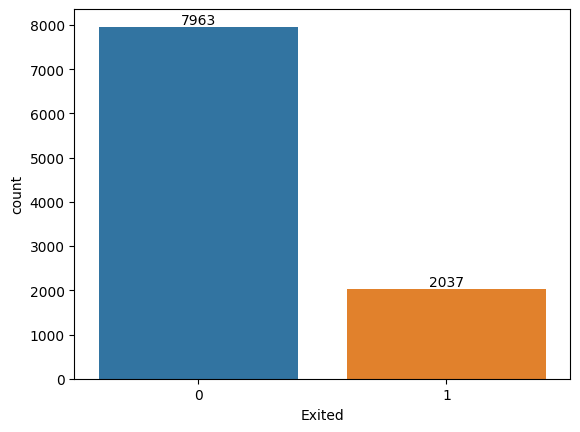

In [13]:
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0]);

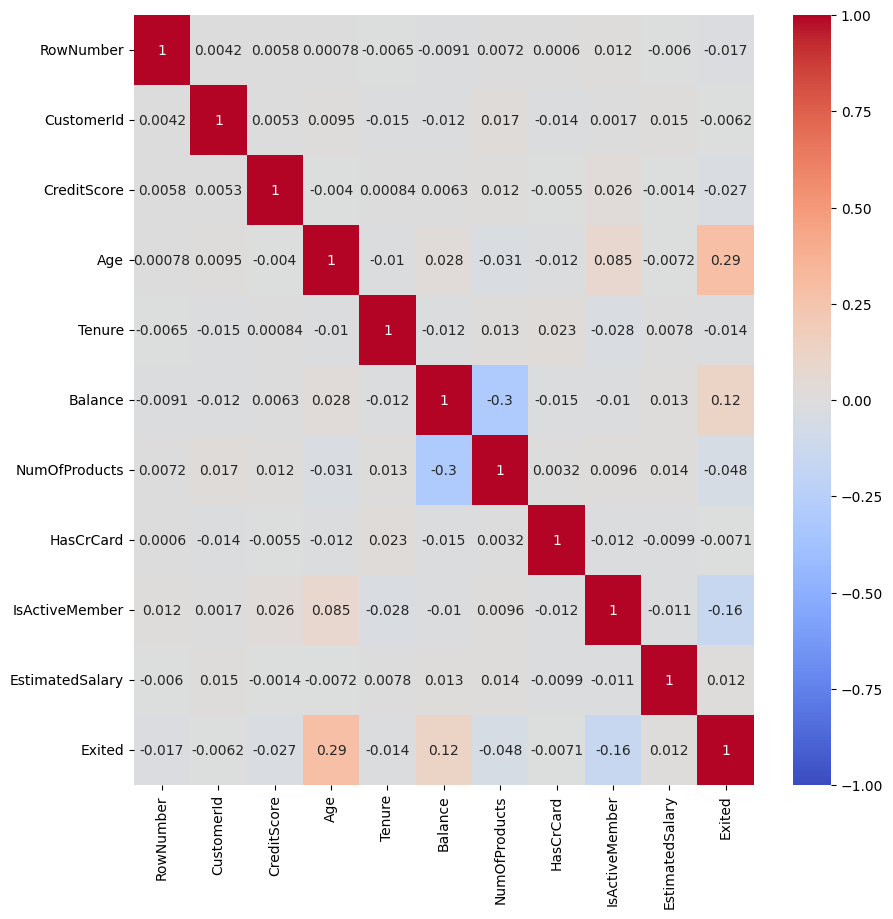

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [15]:
df = df.drop(["Age","RowNumber", "CustomerId", "Surname"], axis = 1)

<ipython-input-16-49a6d830e862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")


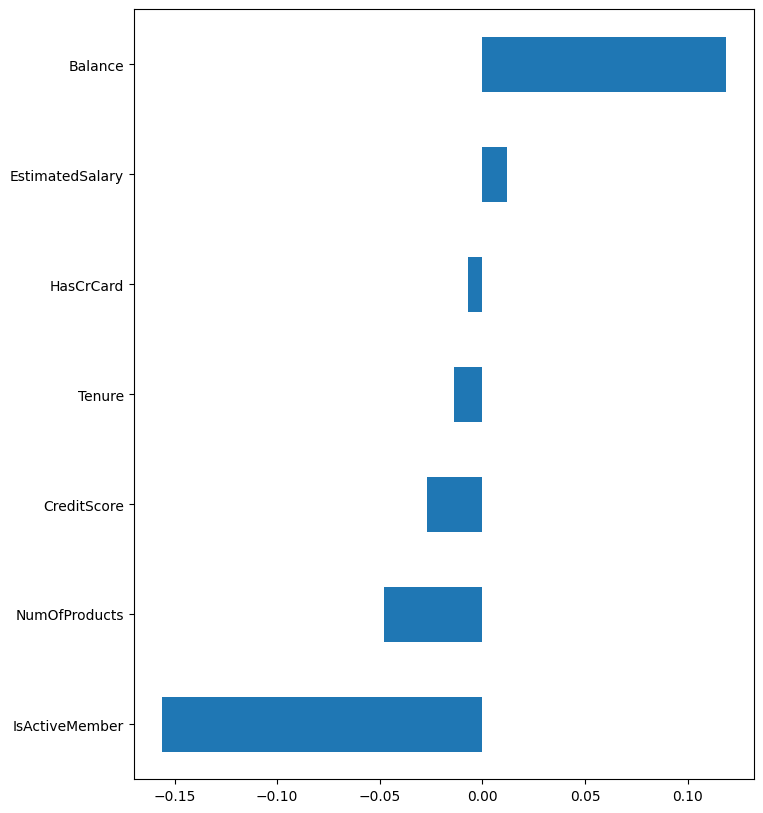

In [16]:
plt.figure(figsize=(8, 10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
plt.show()

In [17]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,2,125510.82,1,1,1,79084.10,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [19]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=42
)

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [23]:
X_train.shape

(9000, 10)

In [24]:
X_test.shape

(1000, 10)

In [25]:
model = Sequential()

model.add(Dense(36, activation = "relu"))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [27]:
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1 , callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 2s 3ms/step - loss: 0.4875 - accuracy: 0.7920 - val_loss: 0.4637 - val_accuracy: 0.7967
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4682 - accuracy: 0.7948 - val_loss: 0.4483 - val_accuracy: 0.7956
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4576 - accuracy: 0.7967 - val_loss: 0.4319 - val_accuracy: 0.8011
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4371 - accuracy: 0.8069 - val_loss: 0.3979 - val_accuracy: 0.8222
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4151 - accuracy: 0.8180 - val_loss: 0.3799 - val_accuracy: 0.8300
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4056 - accuracy: 0.8205 - val_loss: 0.3771 - val_accuracy: 0.8333
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8194 - val_loss: 0.3838 - val_accuracy:

In [28]:
# %env SM_FRAMEWORK=tf.keras
# !pip install keras==2.3.1

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                396       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1243 (4.86 KB)
Trainable params: 1243 (4.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.487483,0.791975,0.463725,0.796667
1,0.468168,0.794815,0.448260,0.795556
2,0.457615,0.796667,0.431883,0.801111
3,0.437137,0.806914,0.397913,0.822222
4,0.415093,0.818025,0.379891,0.830000


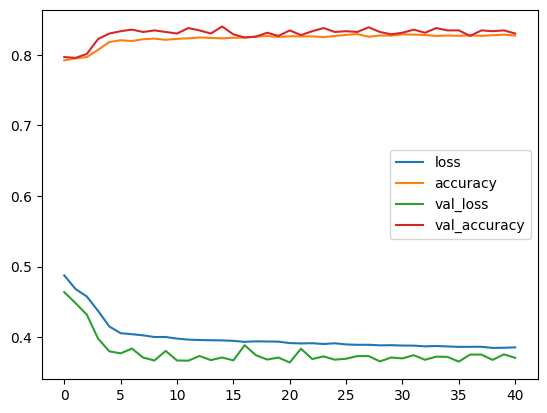

In [31]:
loss_df.plot()
plt.show()

In [32]:
model.evaluate(X_test, y_test, verbose=0)

[0.38966652750968933, 0.8259999752044678]

In [33]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.38966652750968933
accuracy:  0.8259999752044678


In [34]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[776  20]
 [154  50]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       796
           1       0.71      0.25      0.36       204

    accuracy                           0.83      1000
   macro avg       0.77      0.61      0.63      1000
weighted avg       0.81      0.83      0.79      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [35]:
from sklearn.utils import class_weight

In [36]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)

In [37]:
model = Sequential()

model.add(Dense(36, activation = "relu"))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [38]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [39]:
model.fit(x = X_train, y = y_train,
                   validation_split = 0.1,
                   batch_size = 32,
                   epochs = 1000,
                   verbose=1,
                   callbacks = [early_stop],
                   )

Epoch 1/1000
254/254 [==============================] - 2s 3ms/step - loss: 0.4962 - accuracy: 0.7960 - val_loss: 0.4608 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4733 - accuracy: 0.7948 - val_loss: 0.4605 - val_accuracy: 0.8000
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4691 - accuracy: 0.7977 - val_loss: 0.4522 - val_accuracy: 0.7989
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4566 - accuracy: 0.7967 - val_loss: 0.4297 - val_accuracy: 0.8011
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4365 - accuracy: 0.7975 - val_loss: 0.4131 - val_accuracy: 0.8044
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4230 - accuracy: 0.7983 - val_loss: 0.3927 - val_accuracy: 0.8056
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4166 - accuracy: 0.7995 - val_loss: 0.3826 - val_accuracy:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                396       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1243 (4.86 KB)
Trainable params: 1243 (4.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.496167,0.796049,0.460816,0.798889
1,0.473347,0.794815,0.460458,0.800000
2,0.469122,0.797654,0.452188,0.798889
3,0.456565,0.796667,0.429670,0.801111
4,0.436533,0.797531,0.413080,0.804444


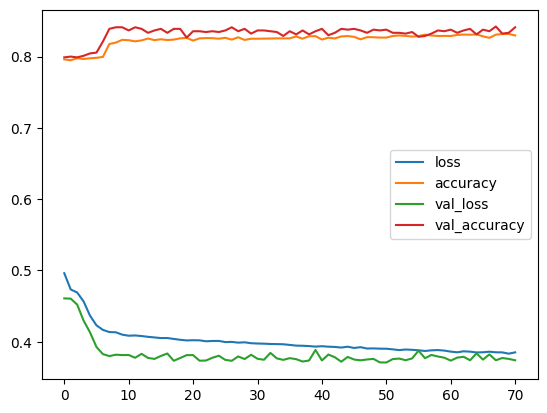

In [42]:
loss_df.plot()
plt.show()

In [43]:
model.evaluate(X_test, y_test, verbose=0)

[0.39455658197402954, 0.8289999961853027]

In [44]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.39455658197402954
accuracy:  0.8289999961853027


In [45]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[756  40]
 [131  73]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       796
           1       0.65      0.36      0.46       204

    accuracy                           0.83      1000
   macro avg       0.75      0.65      0.68      1000
weighted avg       0.81      0.83      0.81      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [47]:
from tensorflow.keras.optimizers import Adam

In [48]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.009)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [49]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [51]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)



Epoch 1/600
257/282 [==========================>...] - ETA: 0s - loss: 0.4789 - accuracy: 0.7996

282/282 [==============================] - 1s 2ms/step - loss: 0.4827 - accuracy: 0.7969
Epoch 2/600
279/282 [============================>.] - ETA: 0s - loss: 0.4414 - accuracy: 0.8090

282/282 [==============================] - 1s 2ms/step - loss: 0.4414 - accuracy: 0.8093
Epoch 3/600
273/282 [============================>.] - ETA: 0s - loss: 0.4097 - accuracy: 0.8193

282/282 [==============================] - 1s 2ms/step - loss: 0.4090 - accuracy: 0.8198
Epoch 4/600
276/282 [============================>.] - ETA: 0s - loss: 0.4061 - accuracy: 0.8220

282/282 [==============================] - 1s 2ms/step - loss: 0.4055 - accuracy: 0.8223
Epoch 5/600
274/282 [============================>.] - ETA: 0s - loss: 0.4035 - accuracy: 0.8173

282/282 [==============================] - 1s 2ms/step - loss: 0.4019 - accuracy: 0.8181
Epoch 6/600
279/282 [============================>.] - ETA: 0s - loss: 0.4001 - accuracy: 0.8200

282/282 [==============================] - 1s 3ms/step - loss: 0.4005 - accuracy: 0.8198
Epoch 7/600
282/282 [==============================] - ETA: 0s - loss: 0.3979 - accuracy: 0.8231

282/282 [==============================] - 1s 4ms/step - loss: 0.3979 - accuracy: 0.8231
Epoch 8/600
280/282 [============================>.] - ETA: 0s - loss: 0.4001 - accuracy: 0.8238

282/282 [==============================] - 1s 5ms/step - loss: 0.3999 - accuracy: 0.8241
Epoch 9/600
274/282 [============================>.] - ETA: 0s - loss: 0.3969 - accuracy: 0.8223

282/282 [==============================] - 1s 5ms/step - loss: 0.3974 - accuracy: 0.8221
Epoch 10/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3968 - accuracy: 0.8230

282/282 [==============================] - 1s 3ms/step - loss: 0.3964 - accuracy: 0.8228
Epoch 11/600
256/282 [==========================>...] - ETA: 0s - loss: 0.3954 - accuracy: 0.8247

282/282 [==============================] - 1s 2ms/step - loss: 0.3976 - accuracy: 0.8240
Epoch 12/600
282/282 [==============================] - ETA: 0s - loss: 0.3967 - accuracy: 0.8240

282/282 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8240
Epoch 13/600
276/282 [============================>.] - ETA: 0s - loss: 0.3958 - accuracy: 0.8224

282/282 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8217
Epoch 14/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3943 - accuracy: 0.8263

282/282 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8251
Epoch 15/600
257/282 [==========================>...] - ETA: 0s - loss: 0.3952 - accuracy: 0.8264

282/282 [==============================] - 1s 2ms/step - loss: 0.3961 - accuracy: 0.8250
Epoch 16/600
273/282 [============================>.] - ETA: 0s - loss: 0.3941 - accuracy: 0.8253

282/282 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.8242
Epoch 17/600
260/282 [==========================>...] - ETA: 0s - loss: 0.3983 - accuracy: 0.8227

282/282 [==============================] - 1s 3ms/step - loss: 0.3963 - accuracy: 0.8234
Epoch 18/600
281/282 [============================>.] - ETA: 0s - loss: 0.3916 - accuracy: 0.8276

282/282 [==============================] - 1s 2ms/step - loss: 0.3920 - accuracy: 0.8274
Epoch 19/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3939 - accuracy: 0.8227

282/282 [==============================] - 1s 2ms/step - loss: 0.3949 - accuracy: 0.8226
Epoch 20/600
255/282 [==========================>...] - ETA: 0s - loss: 0.3913 - accuracy: 0.8284

282/282 [==============================] - 1s 2ms/step - loss: 0.3921 - accuracy: 0.8268
Epoch 21/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3915 - accuracy: 0.8278

282/282 [==============================] - 1s 2ms/step - loss: 0.3927 - accuracy: 0.8264
Epoch 22/600
277/282 [============================>.] - ETA: 0s - loss: 0.3934 - accuracy: 0.8246

282/282 [==============================] - 1s 2ms/step - loss: 0.3929 - accuracy: 0.8249
Epoch 23/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3934 - accuracy: 0.8257

282/282 [==============================] - 1s 2ms/step - loss: 0.3928 - accuracy: 0.8261
Epoch 24/600
281/282 [============================>.] - ETA: 0s - loss: 0.3919 - accuracy: 0.8252

282/282 [==============================] - 1s 2ms/step - loss: 0.3919 - accuracy: 0.8252
Epoch 25/600
274/282 [============================>.] - ETA: 0s - loss: 0.3912 - accuracy: 0.8244

282/282 [==============================] - 1s 2ms/step - loss: 0.3924 - accuracy: 0.8233
Epoch 26/600
280/282 [============================>.] - ETA: 0s - loss: 0.3923 - accuracy: 0.8247

282/282 [==============================] - 1s 2ms/step - loss: 0.3929 - accuracy: 0.8244
Epoch 27/600
273/282 [============================>.] - ETA: 0s - loss: 0.3902 - accuracy: 0.8261

282/282 [==============================] - 1s 2ms/step - loss: 0.3896 - accuracy: 0.8263
Epoch 28/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3896 - accuracy: 0.8259

282/282 [==============================] - 1s 3ms/step - loss: 0.3905 - accuracy: 0.8254
Epoch 29/600
280/282 [============================>.] - ETA: 0s - loss: 0.3893 - accuracy: 0.8298

282/282 [==============================] - 1s 3ms/step - loss: 0.3896 - accuracy: 0.8296
Epoch 30/600
280/282 [============================>.] - ETA: 0s - loss: 0.3908 - accuracy: 0.8271

282/282 [==============================] - 1s 3ms/step - loss: 0.3907 - accuracy: 0.8269
Epoch 31/600
273/282 [============================>.] - ETA: 0s - loss: 0.3894 - accuracy: 0.8280

282/282 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8279
Epoch 32/600
277/282 [============================>.] - ETA: 0s - loss: 0.3875 - accuracy: 0.8280

282/282 [==============================] - 1s 3ms/step - loss: 0.3886 - accuracy: 0.8273
Epoch 33/600
280/282 [============================>.] - ETA: 0s - loss: 0.3886 - accuracy: 0.8290

282/282 [==============================] - 1s 2ms/step - loss: 0.3889 - accuracy: 0.8288
Epoch 34/600
276/282 [============================>.] - ETA: 0s - loss: 0.3883 - accuracy: 0.8273

282/282 [==============================] - 1s 2ms/step - loss: 0.3877 - accuracy: 0.8279
Epoch 35/600
277/282 [============================>.] - ETA: 0s - loss: 0.3857 - accuracy: 0.8285

282/282 [==============================] - 1s 2ms/step - loss: 0.3863 - accuracy: 0.8286
Epoch 36/600
281/282 [============================>.] - ETA: 0s - loss: 0.3868 - accuracy: 0.8290

282/282 [==============================] - 1s 2ms/step - loss: 0.3868 - accuracy: 0.8289
Epoch 37/600
276/282 [============================>.] - ETA: 0s - loss: 0.3883 - accuracy: 0.8280

282/282 [==============================] - 1s 2ms/step - loss: 0.3884 - accuracy: 0.8277
Epoch 38/600
257/282 [==========================>...] - ETA: 0s - loss: 0.3885 - accuracy: 0.8275

282/282 [==============================] - 1s 2ms/step - loss: 0.3878 - accuracy: 0.8291
Epoch 39/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3881 - accuracy: 0.8289

282/282 [==============================] - 1s 2ms/step - loss: 0.3870 - accuracy: 0.8296
Epoch 40/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3864 - accuracy: 0.8267

282/282 [==============================] - 1s 2ms/step - loss: 0.3850 - accuracy: 0.8276
Epoch 41/600
280/282 [============================>.] - ETA: 0s - loss: 0.3854 - accuracy: 0.8296

282/282 [==============================] - 1s 2ms/step - loss: 0.3856 - accuracy: 0.8293
Epoch 42/600
277/282 [============================>.] - ETA: 0s - loss: 0.3863 - accuracy: 0.8298

282/282 [==============================] - 1s 2ms/step - loss: 0.3869 - accuracy: 0.8290
Epoch 43/600
274/282 [============================>.] - ETA: 0s - loss: 0.3827 - accuracy: 0.8319

282/282 [==============================] - 1s 2ms/step - loss: 0.3834 - accuracy: 0.8313
Epoch 44/600
275/282 [============================>.] - ETA: 0s - loss: 0.3823 - accuracy: 0.8303

282/282 [==============================] - 1s 2ms/step - loss: 0.3842 - accuracy: 0.8297
Epoch 45/600
277/282 [============================>.] - ETA: 0s - loss: 0.3826 - accuracy: 0.8300

282/282 [==============================] - 1s 2ms/step - loss: 0.3833 - accuracy: 0.8296
Epoch 46/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3825 - accuracy: 0.8317

282/282 [==============================] - 1s 2ms/step - loss: 0.3837 - accuracy: 0.8309
Epoch 47/600
276/282 [============================>.] - ETA: 0s - loss: 0.3842 - accuracy: 0.8286

282/282 [==============================] - 1s 2ms/step - loss: 0.3838 - accuracy: 0.8290
Epoch 48/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3836 - accuracy: 0.8282

282/282 [==============================] - 1s 2ms/step - loss: 0.3823 - accuracy: 0.8291
Epoch 49/600
278/282 [============================>.] - ETA: 0s - loss: 0.3834 - accuracy: 0.8306

282/282 [==============================] - 1s 2ms/step - loss: 0.3835 - accuracy: 0.8308
Epoch 50/600
280/282 [============================>.] - ETA: 0s - loss: 0.3815 - accuracy: 0.8290

282/282 [==============================] - 1s 2ms/step - loss: 0.3815 - accuracy: 0.8291
Epoch 51/600
278/282 [============================>.] - ETA: 0s - loss: 0.3810 - accuracy: 0.8331

282/282 [==============================] - 1s 2ms/step - loss: 0.3815 - accuracy: 0.8329
Epoch 52/600
277/282 [============================>.] - ETA: 0s - loss: 0.3799 - accuracy: 0.8325

282/282 [==============================] - 1s 2ms/step - loss: 0.3809 - accuracy: 0.8323
Epoch 53/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3802 - accuracy: 0.8301

282/282 [==============================] - 1s 3ms/step - loss: 0.3798 - accuracy: 0.8301
Epoch 54/600
282/282 [==============================] - ETA: 0s - loss: 0.3809 - accuracy: 0.8302

282/282 [==============================] - 1s 3ms/step - loss: 0.3809 - accuracy: 0.8302
Epoch 55/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3800 - accuracy: 0.8298

282/282 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 0.8293
Epoch 56/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3782 - accuracy: 0.8317

282/282 [==============================] - 1s 3ms/step - loss: 0.3789 - accuracy: 0.8314
Epoch 57/600
273/282 [============================>.] - ETA: 0s - loss: 0.3782 - accuracy: 0.8345

282/282 [==============================] - 1s 3ms/step - loss: 0.3795 - accuracy: 0.8343
Epoch 58/600
256/282 [==========================>...] - ETA: 0s - loss: 0.3762 - accuracy: 0.8314

282/282 [==============================] - 1s 2ms/step - loss: 0.3781 - accuracy: 0.8320
Epoch 59/600
282/282 [==============================] - ETA: 0s - loss: 0.3825 - accuracy: 0.8312

282/282 [==============================] - 1s 2ms/step - loss: 0.3825 - accuracy: 0.8312
Epoch 60/600
276/282 [============================>.] - ETA: 0s - loss: 0.3795 - accuracy: 0.8321

282/282 [==============================] - 1s 2ms/step - loss: 0.3792 - accuracy: 0.8321
Epoch 61/600
279/282 [============================>.] - ETA: 0s - loss: 0.3786 - accuracy: 0.8338

282/282 [==============================] - 1s 2ms/step - loss: 0.3788 - accuracy: 0.8337
Epoch 62/600
279/282 [============================>.] - ETA: 0s - loss: 0.3798 - accuracy: 0.8310

282/282 [==============================] - 1s 3ms/step - loss: 0.3789 - accuracy: 0.8316
Epoch 63/600
274/282 [============================>.] - ETA: 0s - loss: 0.3779 - accuracy: 0.8329

282/282 [==============================] - 1s 3ms/step - loss: 0.3787 - accuracy: 0.8327
Epoch 64/600
275/282 [============================>.] - ETA: 0s - loss: 0.3791 - accuracy: 0.8317

282/282 [==============================] - 1s 3ms/step - loss: 0.3784 - accuracy: 0.8323
Epoch 65/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3797 - accuracy: 0.8325

282/282 [==============================] - 1s 5ms/step - loss: 0.3796 - accuracy: 0.8321
Epoch 66/600
261/282 [==========================>...] - ETA: 0s - loss: 0.3767 - accuracy: 0.8336

282/282 [==============================] - 1s 2ms/step - loss: 0.3774 - accuracy: 0.8341
Epoch 67/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3806 - accuracy: 0.8323

282/282 [==============================] - 1s 2ms/step - loss: 0.3793 - accuracy: 0.8323
Epoch 68/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3768 - accuracy: 0.8335

282/282 [==============================] - 1s 2ms/step - loss: 0.3783 - accuracy: 0.8328
Epoch 69/600
273/282 [============================>.] - ETA: 0s - loss: 0.3772 - accuracy: 0.8328

282/282 [==============================] - 1s 2ms/step - loss: 0.3772 - accuracy: 0.8332
Epoch 70/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3766 - accuracy: 0.8331

282/282 [==============================] - 1s 2ms/step - loss: 0.3761 - accuracy: 0.8340
Epoch 71/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3768 - accuracy: 0.8356

282/282 [==============================] - 1s 2ms/step - loss: 0.3778 - accuracy: 0.8346
Epoch 72/600
282/282 [==============================] - ETA: 0s - loss: 0.3770 - accuracy: 0.8339

282/282 [==============================] - 1s 4ms/step - loss: 0.3770 - accuracy: 0.8339
Epoch 73/600
282/282 [==============================] - ETA: 0s - loss: 0.3765 - accuracy: 0.8330

282/282 [==============================] - 2s 6ms/step - loss: 0.3765 - accuracy: 0.8330
Epoch 74/600
273/282 [============================>.] - ETA: 0s - loss: 0.3778 - accuracy: 0.8320

282/282 [==============================] - 2s 6ms/step - loss: 0.3783 - accuracy: 0.8320
Epoch 75/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3780 - accuracy: 0.8346

282/282 [==============================] - 1s 5ms/step - loss: 0.3759 - accuracy: 0.8354
Epoch 76/600
274/282 [============================>.] - ETA: 0s - loss: 0.3757 - accuracy: 0.8329

282/282 [==============================] - 1s 3ms/step - loss: 0.3753 - accuracy: 0.8331
Epoch 77/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3720 - accuracy: 0.8336

282/282 [==============================] - 1s 2ms/step - loss: 0.3757 - accuracy: 0.8317
Epoch 78/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3773 - accuracy: 0.8315

282/282 [==============================] - 1s 2ms/step - loss: 0.3770 - accuracy: 0.8317
Epoch 79/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3764 - accuracy: 0.8328

282/282 [==============================] - 1s 2ms/step - loss: 0.3750 - accuracy: 0.8332
Epoch 80/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3765 - accuracy: 0.8317

282/282 [==============================] - 1s 2ms/step - loss: 0.3748 - accuracy: 0.8327
Epoch 81/600
273/282 [============================>.] - ETA: 0s - loss: 0.3733 - accuracy: 0.8336

282/282 [==============================] - 1s 2ms/step - loss: 0.3755 - accuracy: 0.8327
Epoch 82/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3713 - accuracy: 0.8349

282/282 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8334
Epoch 83/600
277/282 [============================>.] - ETA: 0s - loss: 0.3765 - accuracy: 0.8325

282/282 [==============================] - 1s 2ms/step - loss: 0.3758 - accuracy: 0.8327
Epoch 84/600
276/282 [============================>.] - ETA: 0s - loss: 0.3742 - accuracy: 0.8345

282/282 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8353
Epoch 85/600
261/282 [==========================>...] - ETA: 0s - loss: 0.3732 - accuracy: 0.8344

282/282 [==============================] - 1s 2ms/step - loss: 0.3743 - accuracy: 0.8333
Epoch 86/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3754 - accuracy: 0.8335

282/282 [==============================] - 1s 2ms/step - loss: 0.3753 - accuracy: 0.8339
Epoch 87/600
275/282 [============================>.] - ETA: 0s - loss: 0.3750 - accuracy: 0.8330

282/282 [==============================] - 1s 2ms/step - loss: 0.3758 - accuracy: 0.8327
Epoch 88/600
273/282 [============================>.] - ETA: 0s - loss: 0.3724 - accuracy: 0.8342

282/282 [==============================] - 1s 2ms/step - loss: 0.3727 - accuracy: 0.8343
Epoch 89/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3709 - accuracy: 0.8363

282/282 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.8347
Epoch 90/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3726 - accuracy: 0.8357

282/282 [==============================] - 1s 2ms/step - loss: 0.3736 - accuracy: 0.8352
Epoch 91/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3750 - accuracy: 0.8340

282/282 [==============================] - 1s 2ms/step - loss: 0.3730 - accuracy: 0.8348
Epoch 92/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3721 - accuracy: 0.8354

282/282 [==============================] - 1s 2ms/step - loss: 0.3722 - accuracy: 0.8350
Epoch 93/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3740 - accuracy: 0.8338

282/282 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8347
Epoch 94/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3726 - accuracy: 0.8364

282/282 [==============================] - 1s 3ms/step - loss: 0.3740 - accuracy: 0.8359
Epoch 95/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3723 - accuracy: 0.8347

282/282 [==============================] - 1s 3ms/step - loss: 0.3725 - accuracy: 0.8348
Epoch 96/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3716 - accuracy: 0.8347

282/282 [==============================] - 1s 3ms/step - loss: 0.3722 - accuracy: 0.8336
Epoch 97/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3709 - accuracy: 0.8352

282/282 [==============================] - 1s 3ms/step - loss: 0.3707 - accuracy: 0.8356
Epoch 98/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3733 - accuracy: 0.8357

282/282 [==============================] - 1s 3ms/step - loss: 0.3718 - accuracy: 0.8358
Epoch 99/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3696 - accuracy: 0.8372

282/282 [==============================] - 1s 2ms/step - loss: 0.3712 - accuracy: 0.8358
Epoch 100/600
273/282 [============================>.] - ETA: 0s - loss: 0.3699 - accuracy: 0.8385

282/282 [==============================] - 1s 2ms/step - loss: 0.3704 - accuracy: 0.8384
Epoch 101/600
279/282 [============================>.] - ETA: 0s - loss: 0.3735 - accuracy: 0.8357

282/282 [==============================] - 1s 2ms/step - loss: 0.3740 - accuracy: 0.8354
Epoch 102/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3710 - accuracy: 0.8366

282/282 [==============================] - 1s 2ms/step - loss: 0.3694 - accuracy: 0.8368
Epoch 103/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3732 - accuracy: 0.8358

282/282 [==============================] - 1s 2ms/step - loss: 0.3713 - accuracy: 0.8363
Epoch 104/600
277/282 [============================>.] - ETA: 0s - loss: 0.3726 - accuracy: 0.8354

282/282 [==============================] - 1s 3ms/step - loss: 0.3716 - accuracy: 0.8359
Epoch 105/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3724 - accuracy: 0.8375

282/282 [==============================] - 1s 2ms/step - loss: 0.3732 - accuracy: 0.8373
Epoch 106/600
273/282 [============================>.] - ETA: 0s - loss: 0.3704 - accuracy: 0.8384

282/282 [==============================] - 1s 2ms/step - loss: 0.3713 - accuracy: 0.8386
Epoch 107/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3696 - accuracy: 0.8382

282/282 [==============================] - 1s 2ms/step - loss: 0.3699 - accuracy: 0.8384
Epoch 108/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3700 - accuracy: 0.8381

282/282 [==============================] - 1s 2ms/step - loss: 0.3703 - accuracy: 0.8384
Epoch 109/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3690 - accuracy: 0.8359

282/282 [==============================] - 1s 2ms/step - loss: 0.3682 - accuracy: 0.8363
Epoch 110/600
276/282 [============================>.] - ETA: 0s - loss: 0.3683 - accuracy: 0.8389

282/282 [==============================] - 1s 2ms/step - loss: 0.3695 - accuracy: 0.8383
Epoch 111/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3711 - accuracy: 0.8364

282/282 [==============================] - 1s 2ms/step - loss: 0.3692 - accuracy: 0.8377
Epoch 112/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3659 - accuracy: 0.8394

282/282 [==============================] - 1s 2ms/step - loss: 0.3685 - accuracy: 0.8379
Epoch 113/600
278/282 [============================>.] - ETA: 0s - loss: 0.3696 - accuracy: 0.8390

282/282 [==============================] - 1s 2ms/step - loss: 0.3705 - accuracy: 0.8384
Epoch 114/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3654 - accuracy: 0.8413

282/282 [==============================] - 1s 2ms/step - loss: 0.3677 - accuracy: 0.8388
Epoch 115/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3712 - accuracy: 0.8351

282/282 [==============================] - 1s 2ms/step - loss: 0.3701 - accuracy: 0.8360
Epoch 116/600
282/282 [==============================] - ETA: 0s - loss: 0.3686 - accuracy: 0.8359

282/282 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.8359
Epoch 117/600
280/282 [============================>.] - ETA: 0s - loss: 0.3670 - accuracy: 0.8394

282/282 [==============================] - 1s 3ms/step - loss: 0.3683 - accuracy: 0.8388
Epoch 118/600
273/282 [============================>.] - ETA: 0s - loss: 0.3696 - accuracy: 0.8380

282/282 [==============================] - 1s 3ms/step - loss: 0.3682 - accuracy: 0.8389
Epoch 119/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3691 - accuracy: 0.8387

282/282 [==============================] - 1s 3ms/step - loss: 0.3681 - accuracy: 0.8397
Epoch 120/600
276/282 [============================>.] - ETA: 0s - loss: 0.3704 - accuracy: 0.8374

282/282 [==============================] - 1s 3ms/step - loss: 0.3689 - accuracy: 0.8381
Epoch 121/600
281/282 [============================>.] - ETA: 0s - loss: 0.3675 - accuracy: 0.8389

282/282 [==============================] - 1s 3ms/step - loss: 0.3674 - accuracy: 0.8389
Epoch 122/600
256/282 [==========================>...] - ETA: 0s - loss: 0.3668 - accuracy: 0.8390

282/282 [==============================] - 1s 3ms/step - loss: 0.3692 - accuracy: 0.8379
Epoch 123/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3683 - accuracy: 0.8372

282/282 [==============================] - 1s 2ms/step - loss: 0.3691 - accuracy: 0.8364
Epoch 124/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3674 - accuracy: 0.8397

282/282 [==============================] - 1s 2ms/step - loss: 0.3661 - accuracy: 0.8397
Epoch 125/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3698 - accuracy: 0.8378

282/282 [==============================] - 1s 2ms/step - loss: 0.3697 - accuracy: 0.8374
Epoch 126/600
275/282 [============================>.] - ETA: 0s - loss: 0.3662 - accuracy: 0.8414

282/282 [==============================] - 1s 2ms/step - loss: 0.3670 - accuracy: 0.8416
Epoch 127/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3608 - accuracy: 0.8414

282/282 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8391
Epoch 128/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3630 - accuracy: 0.8423

282/282 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8408
Epoch 129/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3684 - accuracy: 0.8378

282/282 [==============================] - 1s 2ms/step - loss: 0.3668 - accuracy: 0.8382
Epoch 130/600
273/282 [============================>.] - ETA: 0s - loss: 0.3683 - accuracy: 0.8393

282/282 [==============================] - 1s 2ms/step - loss: 0.3679 - accuracy: 0.8392
Epoch 131/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3661 - accuracy: 0.8396

282/282 [==============================] - 1s 2ms/step - loss: 0.3672 - accuracy: 0.8393
Epoch 132/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3630 - accuracy: 0.8395

282/282 [==============================] - 1s 2ms/step - loss: 0.3650 - accuracy: 0.8390
Epoch 133/600
277/282 [============================>.] - ETA: 0s - loss: 0.3665 - accuracy: 0.8353

282/282 [==============================] - 1s 2ms/step - loss: 0.3674 - accuracy: 0.8349
Epoch 134/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3638 - accuracy: 0.8415

282/282 [==============================] - 1s 2ms/step - loss: 0.3664 - accuracy: 0.8402
Epoch 135/600
273/282 [============================>.] - ETA: 0s - loss: 0.3646 - accuracy: 0.8403

282/282 [==============================] - 1s 2ms/step - loss: 0.3657 - accuracy: 0.8403
Epoch 136/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3684 - accuracy: 0.8389

282/282 [==============================] - 1s 2ms/step - loss: 0.3689 - accuracy: 0.8380
Epoch 137/600
260/282 [==========================>...] - ETA: 0s - loss: 0.3656 - accuracy: 0.8417

282/282 [==============================] - 1s 2ms/step - loss: 0.3674 - accuracy: 0.8396
Epoch 138/600
258/282 [==========================>...] - ETA: 0s - loss: 0.3623 - accuracy: 0.8400

282/282 [==============================] - 1s 2ms/step - loss: 0.3649 - accuracy: 0.8397
Epoch 139/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3712 - accuracy: 0.8352

282/282 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.8367
Epoch 140/600
277/282 [============================>.] - ETA: 0s - loss: 0.3681 - accuracy: 0.8405

282/282 [==============================] - 1s 2ms/step - loss: 0.3670 - accuracy: 0.8411
Epoch 141/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3674 - accuracy: 0.8369

282/282 [==============================] - 1s 3ms/step - loss: 0.3668 - accuracy: 0.8370
Epoch 142/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3638 - accuracy: 0.8407

282/282 [==============================] - 1s 3ms/step - loss: 0.3661 - accuracy: 0.8390
Epoch 143/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3651 - accuracy: 0.8356

282/282 [==============================] - 1s 3ms/step - loss: 0.3655 - accuracy: 0.8356
Epoch 144/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3658 - accuracy: 0.8381

282/282 [==============================] - 1s 3ms/step - loss: 0.3648 - accuracy: 0.8373
Epoch 145/600
281/282 [============================>.] - ETA: 0s - loss: 0.3673 - accuracy: 0.8363

282/282 [==============================] - 1s 3ms/step - loss: 0.3673 - accuracy: 0.8363
Epoch 146/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3664 - accuracy: 0.8371

282/282 [==============================] - 1s 3ms/step - loss: 0.3652 - accuracy: 0.8376
Epoch 147/600
260/282 [==========================>...] - ETA: 0s - loss: 0.3653 - accuracy: 0.8401

282/282 [==============================] - 1s 2ms/step - loss: 0.3674 - accuracy: 0.8388
Epoch 148/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3649 - accuracy: 0.8402

282/282 [==============================] - 1s 2ms/step - loss: 0.3649 - accuracy: 0.8401
Epoch 149/600
273/282 [============================>.] - ETA: 0s - loss: 0.3630 - accuracy: 0.8410

282/282 [==============================] - 1s 2ms/step - loss: 0.3640 - accuracy: 0.8406
Epoch 150/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3653 - accuracy: 0.8363

282/282 [==============================] - 1s 2ms/step - loss: 0.3642 - accuracy: 0.8377
Epoch 151/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3648 - accuracy: 0.8399

282/282 [==============================] - 1s 2ms/step - loss: 0.3647 - accuracy: 0.8393
Epoch 152/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3688 - accuracy: 0.8374

282/282 [==============================] - 1s 2ms/step - loss: 0.3644 - accuracy: 0.8399
Epoch 153/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3669 - accuracy: 0.8381

282/282 [==============================] - 1s 2ms/step - loss: 0.3659 - accuracy: 0.8393
Epoch 154/600
282/282 [==============================] - ETA: 0s - loss: 0.3645 - accuracy: 0.8386

282/282 [==============================] - 1s 2ms/step - loss: 0.3645 - accuracy: 0.8386
Epoch 155/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3650 - accuracy: 0.8402

282/282 [==============================] - 1s 2ms/step - loss: 0.3645 - accuracy: 0.8397
Epoch 156/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3616 - accuracy: 0.8426

282/282 [==============================] - 1s 3ms/step - loss: 0.3641 - accuracy: 0.8407
Epoch 157/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3622 - accuracy: 0.8414

282/282 [==============================] - 1s 2ms/step - loss: 0.3632 - accuracy: 0.8408
Epoch 158/600
273/282 [============================>.] - ETA: 0s - loss: 0.3657 - accuracy: 0.8397

282/282 [==============================] - 1s 3ms/step - loss: 0.3653 - accuracy: 0.8393
Epoch 159/600
278/282 [============================>.] - ETA: 0s - loss: 0.3639 - accuracy: 0.8393

282/282 [==============================] - 1s 3ms/step - loss: 0.3652 - accuracy: 0.8389
Epoch 160/600
276/282 [============================>.] - ETA: 0s - loss: 0.3661 - accuracy: 0.8392

282/282 [==============================] - 1s 3ms/step - loss: 0.3653 - accuracy: 0.8396
Epoch 161/600
278/282 [============================>.] - ETA: 0s - loss: 0.3640 - accuracy: 0.8393

282/282 [==============================] - 1s 5ms/step - loss: 0.3638 - accuracy: 0.8393
Epoch 162/600
275/282 [============================>.] - ETA: 0s - loss: 0.3642 - accuracy: 0.8389

282/282 [==============================] - 1s 3ms/step - loss: 0.3640 - accuracy: 0.8382
Epoch 163/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3644 - accuracy: 0.8385

282/282 [==============================] - 1s 3ms/step - loss: 0.3633 - accuracy: 0.8396
Epoch 164/600
273/282 [============================>.] - ETA: 0s - loss: 0.3634 - accuracy: 0.8400

282/282 [==============================] - 1s 3ms/step - loss: 0.3649 - accuracy: 0.8398
Epoch 165/600
280/282 [============================>.] - ETA: 0s - loss: 0.3623 - accuracy: 0.8400

282/282 [==============================] - 1s 3ms/step - loss: 0.3621 - accuracy: 0.8403
Epoch 166/600
274/282 [============================>.] - ETA: 0s - loss: 0.3632 - accuracy: 0.8401

282/282 [==============================] - 1s 3ms/step - loss: 0.3635 - accuracy: 0.8402
Epoch 167/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3628 - accuracy: 0.8402

282/282 [==============================] - 1s 2ms/step - loss: 0.3631 - accuracy: 0.8390
Epoch 168/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3634 - accuracy: 0.8396

282/282 [==============================] - 1s 2ms/step - loss: 0.3641 - accuracy: 0.8392
Epoch 169/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3636 - accuracy: 0.8378

282/282 [==============================] - 1s 2ms/step - loss: 0.3626 - accuracy: 0.8381
Epoch 170/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3609 - accuracy: 0.8411

282/282 [==============================] - 1s 2ms/step - loss: 0.3620 - accuracy: 0.8396
Epoch 171/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3642 - accuracy: 0.8377

282/282 [==============================] - 1s 2ms/step - loss: 0.3642 - accuracy: 0.8377
Epoch 172/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3619 - accuracy: 0.8395

282/282 [==============================] - 1s 2ms/step - loss: 0.3622 - accuracy: 0.8390
Epoch 173/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3641 - accuracy: 0.8369

282/282 [==============================] - 1s 2ms/step - loss: 0.3629 - accuracy: 0.8381
Epoch 174/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3660 - accuracy: 0.8372

282/282 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8372
Epoch 175/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3607 - accuracy: 0.8378

282/282 [==============================] - 1s 2ms/step - loss: 0.3615 - accuracy: 0.8374
Epoch 176/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3604 - accuracy: 0.8421

282/282 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.8410
Epoch 177/600
259/282 [==========================>...] - ETA: 0s - loss: 0.3602 - accuracy: 0.8395

282/282 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.8384
Epoch 178/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3628 - accuracy: 0.8397

282/282 [==============================] - 1s 2ms/step - loss: 0.3624 - accuracy: 0.8406
Epoch 179/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3626 - accuracy: 0.8392

282/282 [==============================] - 1s 2ms/step - loss: 0.3610 - accuracy: 0.8396
Epoch 180/600
274/282 [============================>.] - ETA: 0s - loss: 0.3611 - accuracy: 0.8406

282/282 [==============================] - 1s 2ms/step - loss: 0.3617 - accuracy: 0.8403
Epoch 181/600
261/282 [==========================>...] - ETA: 0s - loss: 0.3615 - accuracy: 0.8391

282/282 [==============================] - 1s 2ms/step - loss: 0.3615 - accuracy: 0.8387
Epoch 182/600
257/282 [==========================>...] - ETA: 0s - loss: 0.3707 - accuracy: 0.8354

282/282 [==============================] - 1s 2ms/step - loss: 0.3656 - accuracy: 0.8384
Epoch 183/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3606 - accuracy: 0.8377

282/282 [==============================] - 1s 2ms/step - loss: 0.3622 - accuracy: 0.8374
Epoch 184/600
280/282 [============================>.] - ETA: 0s - loss: 0.3607 - accuracy: 0.8401

282/282 [==============================] - 1s 2ms/step - loss: 0.3604 - accuracy: 0.8404
Epoch 185/600
281/282 [============================>.] - ETA: 0s - loss: 0.3626 - accuracy: 0.8393

282/282 [==============================] - 1s 3ms/step - loss: 0.3625 - accuracy: 0.8393
Epoch 186/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3631 - accuracy: 0.8401

282/282 [==============================] - 1s 3ms/step - loss: 0.3619 - accuracy: 0.8403
Epoch 187/600
282/282 [==============================] - ETA: 0s - loss: 0.3624 - accuracy: 0.8408

282/282 [==============================] - 1s 3ms/step - loss: 0.3624 - accuracy: 0.8408
Epoch 188/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3641 - accuracy: 0.8382

282/282 [==============================] - 1s 3ms/step - loss: 0.3617 - accuracy: 0.8389
Epoch 189/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3579 - accuracy: 0.8425

282/282 [==============================] - 1s 3ms/step - loss: 0.3583 - accuracy: 0.8426
Epoch 190/600
282/282 [==============================] - ETA: 0s - loss: 0.3619 - accuracy: 0.8394

282/282 [==============================] - 1s 3ms/step - loss: 0.3619 - accuracy: 0.8394
Epoch 191/600
274/282 [============================>.] - ETA: 0s - loss: 0.3606 - accuracy: 0.8391

282/282 [==============================] - 1s 3ms/step - loss: 0.3607 - accuracy: 0.8391
Epoch 192/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3627 - accuracy: 0.8389

282/282 [==============================] - 1s 3ms/step - loss: 0.3620 - accuracy: 0.8394
Epoch 193/600
277/282 [============================>.] - ETA: 0s - loss: 0.3614 - accuracy: 0.8413

282/282 [==============================] - 1s 3ms/step - loss: 0.3608 - accuracy: 0.8417
Epoch 194/600
279/282 [============================>.] - ETA: 0s - loss: 0.3594 - accuracy: 0.8396

282/282 [==============================] - 1s 3ms/step - loss: 0.3603 - accuracy: 0.8393
Epoch 195/600
281/282 [============================>.] - ETA: 0s - loss: 0.3604 - accuracy: 0.8409

282/282 [==============================] - 1s 3ms/step - loss: 0.3604 - accuracy: 0.8408
Epoch 196/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3607 - accuracy: 0.8417

282/282 [==============================] - 1s 2ms/step - loss: 0.3608 - accuracy: 0.8406
Epoch 197/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3577 - accuracy: 0.8424

282/282 [==============================] - 1s 2ms/step - loss: 0.3599 - accuracy: 0.8404
Epoch 198/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3586 - accuracy: 0.8388

282/282 [==============================] - 1s 2ms/step - loss: 0.3581 - accuracy: 0.8403
Epoch 199/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3578 - accuracy: 0.8419

282/282 [==============================] - 1s 4ms/step - loss: 0.3602 - accuracy: 0.8397
Epoch 200/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3565 - accuracy: 0.8443

282/282 [==============================] - 1s 4ms/step - loss: 0.3578 - accuracy: 0.8431
Epoch 201/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3580 - accuracy: 0.8416

282/282 [==============================] - 1s 3ms/step - loss: 0.3583 - accuracy: 0.8414
Epoch 202/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3574 - accuracy: 0.8402

282/282 [==============================] - 1s 2ms/step - loss: 0.3584 - accuracy: 0.8390
Epoch 203/600
275/282 [============================>.] - ETA: 0s - loss: 0.3584 - accuracy: 0.8419

282/282 [==============================] - 1s 2ms/step - loss: 0.3588 - accuracy: 0.8416
Epoch 204/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3556 - accuracy: 0.8405

282/282 [==============================] - 1s 3ms/step - loss: 0.3575 - accuracy: 0.8397
Epoch 205/600
278/282 [============================>.] - ETA: 0s - loss: 0.3573 - accuracy: 0.8415

282/282 [==============================] - 1s 3ms/step - loss: 0.3571 - accuracy: 0.8417
Epoch 206/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3576 - accuracy: 0.8413

282/282 [==============================] - 1s 3ms/step - loss: 0.3573 - accuracy: 0.8407
Epoch 207/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3579 - accuracy: 0.8402

282/282 [==============================] - 1s 3ms/step - loss: 0.3570 - accuracy: 0.8408
Epoch 208/600
278/282 [============================>.] - ETA: 0s - loss: 0.3612 - accuracy: 0.8394

282/282 [==============================] - 1s 3ms/step - loss: 0.3598 - accuracy: 0.8403
Epoch 209/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3594 - accuracy: 0.8396

282/282 [==============================] - 1s 3ms/step - loss: 0.3588 - accuracy: 0.8402
Epoch 210/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3590 - accuracy: 0.8405

282/282 [==============================] - 1s 2ms/step - loss: 0.3569 - accuracy: 0.8416
Epoch 211/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3518 - accuracy: 0.8417

282/282 [==============================] - 1s 2ms/step - loss: 0.3549 - accuracy: 0.8406
Epoch 212/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3583 - accuracy: 0.8418

282/282 [==============================] - 1s 2ms/step - loss: 0.3586 - accuracy: 0.8420
Epoch 213/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3584 - accuracy: 0.8429

282/282 [==============================] - 1s 2ms/step - loss: 0.3583 - accuracy: 0.8428
Epoch 214/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3582 - accuracy: 0.8390

282/282 [==============================] - 1s 2ms/step - loss: 0.3577 - accuracy: 0.8390
Epoch 215/600
281/282 [============================>.] - ETA: 0s - loss: 0.3577 - accuracy: 0.8394

282/282 [==============================] - 1s 2ms/step - loss: 0.3580 - accuracy: 0.8394
Epoch 216/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3563 - accuracy: 0.8433

282/282 [==============================] - 1s 2ms/step - loss: 0.3562 - accuracy: 0.8431
Epoch 217/600
258/282 [==========================>...] - ETA: 0s - loss: 0.3533 - accuracy: 0.8428

282/282 [==============================] - 1s 2ms/step - loss: 0.3545 - accuracy: 0.8422
Epoch 218/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3564 - accuracy: 0.8397

282/282 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8407
Epoch 219/600
261/282 [==========================>...] - ETA: 0s - loss: 0.3550 - accuracy: 0.8418

282/282 [==============================] - 1s 2ms/step - loss: 0.3573 - accuracy: 0.8409
Epoch 220/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3604 - accuracy: 0.8390

282/282 [==============================] - 1s 2ms/step - loss: 0.3583 - accuracy: 0.8404
Epoch 221/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3582 - accuracy: 0.8417

282/282 [==============================] - 1s 2ms/step - loss: 0.3574 - accuracy: 0.8419
Epoch 222/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3562 - accuracy: 0.8416

282/282 [==============================] - 1s 2ms/step - loss: 0.3569 - accuracy: 0.8420
Epoch 223/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3520 - accuracy: 0.8433

282/282 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.8432
Epoch 224/600
279/282 [============================>.] - ETA: 0s - loss: 0.3537 - accuracy: 0.8409

282/282 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.8409
Epoch 225/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3571 - accuracy: 0.8408

282/282 [==============================] - 1s 2ms/step - loss: 0.3581 - accuracy: 0.8401
Epoch 226/600
279/282 [============================>.] - ETA: 0s - loss: 0.3566 - accuracy: 0.8403

282/282 [==============================] - 1s 2ms/step - loss: 0.3563 - accuracy: 0.8403
Epoch 227/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3543 - accuracy: 0.8396

282/282 [==============================] - 1s 3ms/step - loss: 0.3572 - accuracy: 0.8374
Epoch 228/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3579 - accuracy: 0.8419

282/282 [==============================] - 1s 3ms/step - loss: 0.3570 - accuracy: 0.8421
Epoch 229/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3538 - accuracy: 0.8426

282/282 [==============================] - 1s 3ms/step - loss: 0.3545 - accuracy: 0.8423
Epoch 230/600
274/282 [============================>.] - ETA: 0s - loss: 0.3514 - accuracy: 0.8455

282/282 [==============================] - 1s 3ms/step - loss: 0.3528 - accuracy: 0.8444
Epoch 231/600
279/282 [============================>.] - ETA: 0s - loss: 0.3584 - accuracy: 0.8417

282/282 [==============================] - 1s 3ms/step - loss: 0.3574 - accuracy: 0.8422
Epoch 232/600
276/282 [============================>.] - ETA: 0s - loss: 0.3552 - accuracy: 0.8399

282/282 [==============================] - 1s 3ms/step - loss: 0.3554 - accuracy: 0.8398
Epoch 233/600
279/282 [============================>.] - ETA: 0s - loss: 0.3522 - accuracy: 0.8433

282/282 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.8430
Epoch 234/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3539 - accuracy: 0.8418

282/282 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8423
Epoch 235/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3531 - accuracy: 0.8423

282/282 [==============================] - 1s 2ms/step - loss: 0.3543 - accuracy: 0.8407
Epoch 236/600
274/282 [============================>.] - ETA: 0s - loss: 0.3559 - accuracy: 0.8416

282/282 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8414
Epoch 237/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3492 - accuracy: 0.8471

282/282 [==============================] - 1s 2ms/step - loss: 0.3548 - accuracy: 0.8428
Epoch 238/600
257/282 [==========================>...] - ETA: 0s - loss: 0.3559 - accuracy: 0.8444

282/282 [==============================] - 1s 2ms/step - loss: 0.3565 - accuracy: 0.8440
Epoch 239/600
260/282 [==========================>...] - ETA: 0s - loss: 0.3510 - accuracy: 0.8422

282/282 [==============================] - 1s 2ms/step - loss: 0.3542 - accuracy: 0.8407
Epoch 240/600
281/282 [============================>.] - ETA: 0s - loss: 0.3562 - accuracy: 0.8417

282/282 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8418
Epoch 241/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3482 - accuracy: 0.8428

282/282 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.8423
Epoch 242/600
261/282 [==========================>...] - ETA: 0s - loss: 0.3547 - accuracy: 0.8385

282/282 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.8381
Epoch 243/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3521 - accuracy: 0.8449

282/282 [==============================] - 1s 2ms/step - loss: 0.3536 - accuracy: 0.8440
Epoch 244/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3540 - accuracy: 0.8404

282/282 [==============================] - 1s 2ms/step - loss: 0.3539 - accuracy: 0.8410
Epoch 245/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3516 - accuracy: 0.8420

282/282 [==============================] - 1s 2ms/step - loss: 0.3536 - accuracy: 0.8407
Epoch 246/600
260/282 [==========================>...] - ETA: 0s - loss: 0.3537 - accuracy: 0.8429

282/282 [==============================] - 1s 2ms/step - loss: 0.3539 - accuracy: 0.8431
Epoch 247/600
281/282 [============================>.] - ETA: 0s - loss: 0.3545 - accuracy: 0.8425

282/282 [==============================] - 1s 2ms/step - loss: 0.3543 - accuracy: 0.8426
Epoch 248/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3505 - accuracy: 0.8450

282/282 [==============================] - 1s 2ms/step - loss: 0.3523 - accuracy: 0.8439
Epoch 249/600
258/282 [==========================>...] - ETA: 0s - loss: 0.3489 - accuracy: 0.8434

282/282 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8418
Epoch 250/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3528 - accuracy: 0.8436

282/282 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.8448
Epoch 251/600
276/282 [============================>.] - ETA: 0s - loss: 0.3554 - accuracy: 0.8419

282/282 [==============================] - 1s 3ms/step - loss: 0.3554 - accuracy: 0.8422
Epoch 252/600
278/282 [============================>.] - ETA: 0s - loss: 0.3518 - accuracy: 0.8404

282/282 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.8400
Epoch 253/600
274/282 [============================>.] - ETA: 0s - loss: 0.3491 - accuracy: 0.8424

282/282 [==============================] - 1s 3ms/step - loss: 0.3504 - accuracy: 0.8419
Epoch 254/600
273/282 [============================>.] - ETA: 0s - loss: 0.3522 - accuracy: 0.8416

282/282 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.8421
Epoch 255/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3568 - accuracy: 0.8388

282/282 [==============================] - 1s 3ms/step - loss: 0.3556 - accuracy: 0.8393
Epoch 256/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3505 - accuracy: 0.8431

282/282 [==============================] - 1s 3ms/step - loss: 0.3526 - accuracy: 0.8426
Epoch 257/600
281/282 [============================>.] - ETA: 0s - loss: 0.3515 - accuracy: 0.8439

282/282 [==============================] - 1s 2ms/step - loss: 0.3513 - accuracy: 0.8440
Epoch 258/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3503 - accuracy: 0.8445

282/282 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8433
Epoch 259/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3503 - accuracy: 0.8424

282/282 [==============================] - 1s 2ms/step - loss: 0.3504 - accuracy: 0.8422
Epoch 260/600
260/282 [==========================>...] - ETA: 0s - loss: 0.3481 - accuracy: 0.8446

282/282 [==============================] - 1s 2ms/step - loss: 0.3496 - accuracy: 0.8429
Epoch 261/600
258/282 [==========================>...] - ETA: 0s - loss: 0.3525 - accuracy: 0.8425

282/282 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.8420
Epoch 262/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3532 - accuracy: 0.8376

282/282 [==============================] - 1s 2ms/step - loss: 0.3554 - accuracy: 0.8366
Epoch 263/600
258/282 [==========================>...] - ETA: 0s - loss: 0.3522 - accuracy: 0.8394

282/282 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.8393
Epoch 264/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3469 - accuracy: 0.8435

282/282 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.8424
Epoch 265/600
260/282 [==========================>...] - ETA: 0s - loss: 0.3514 - accuracy: 0.8448

282/282 [==============================] - 1s 2ms/step - loss: 0.3531 - accuracy: 0.8440
Epoch 266/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3480 - accuracy: 0.8414

282/282 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.8408
Epoch 267/600
254/282 [==========================>...] - ETA: 0s - loss: 0.3519 - accuracy: 0.8429

282/282 [==============================] - 1s 2ms/step - loss: 0.3509 - accuracy: 0.8437
Epoch 268/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3545 - accuracy: 0.8414

282/282 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8408
Epoch 269/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3528 - accuracy: 0.8396

282/282 [==============================] - 1s 2ms/step - loss: 0.3516 - accuracy: 0.8399
Epoch 270/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3502 - accuracy: 0.8429

282/282 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8430
Epoch 271/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3498 - accuracy: 0.8439

282/282 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.8421
Epoch 272/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3505 - accuracy: 0.8407

282/282 [==============================] - 1s 2ms/step - loss: 0.3504 - accuracy: 0.8414
Epoch 273/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3515 - accuracy: 0.8401

282/282 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.8416
Epoch 274/600
281/282 [============================>.] - ETA: 0s - loss: 0.3498 - accuracy: 0.8414

282/282 [==============================] - 1s 2ms/step - loss: 0.3498 - accuracy: 0.8412
Epoch 275/600
275/282 [============================>.] - ETA: 0s - loss: 0.3501 - accuracy: 0.8406

282/282 [==============================] - 1s 3ms/step - loss: 0.3502 - accuracy: 0.8402
Epoch 276/600
280/282 [============================>.] - ETA: 0s - loss: 0.3518 - accuracy: 0.8419

282/282 [==============================] - 1s 3ms/step - loss: 0.3521 - accuracy: 0.8419
Epoch 277/600
282/282 [==============================] - ETA: 0s - loss: 0.3511 - accuracy: 0.8420

282/282 [==============================] - 1s 3ms/step - loss: 0.3511 - accuracy: 0.8420
Epoch 278/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3525 - accuracy: 0.8427

282/282 [==============================] - 1s 3ms/step - loss: 0.3545 - accuracy: 0.8417
Epoch 279/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3525 - accuracy: 0.8417

282/282 [==============================] - 1s 3ms/step - loss: 0.3541 - accuracy: 0.8409
Epoch 280/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3517 - accuracy: 0.8409

282/282 [==============================] - 1s 3ms/step - loss: 0.3525 - accuracy: 0.8401
Epoch 281/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3485 - accuracy: 0.8435

282/282 [==============================] - 1s 2ms/step - loss: 0.3483 - accuracy: 0.8438
Epoch 282/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3519 - accuracy: 0.8413

282/282 [==============================] - 1s 2ms/step - loss: 0.3518 - accuracy: 0.8420
Epoch 283/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3486 - accuracy: 0.8429

282/282 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8427
Epoch 284/600
259/282 [==========================>...] - ETA: 0s - loss: 0.3508 - accuracy: 0.8409

282/282 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.8403
Epoch 285/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3559 - accuracy: 0.8396

282/282 [==============================] - 1s 2ms/step - loss: 0.3541 - accuracy: 0.8411
Epoch 286/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3518 - accuracy: 0.8414

282/282 [==============================] - 1s 2ms/step - loss: 0.3511 - accuracy: 0.8410
Epoch 287/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3479 - accuracy: 0.8416

282/282 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8389
Epoch 288/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3519 - accuracy: 0.8435

282/282 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.8421
Epoch 289/600
282/282 [==============================] - ETA: 0s - loss: 0.3519 - accuracy: 0.8411

282/282 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8411
Epoch 290/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3534 - accuracy: 0.8384

282/282 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.8374
Epoch 291/600
261/282 [==========================>...] - ETA: 0s - loss: 0.3488 - accuracy: 0.8428

282/282 [==============================] - 1s 2ms/step - loss: 0.3508 - accuracy: 0.8417
Epoch 292/600
259/282 [==========================>...] - ETA: 0s - loss: 0.3520 - accuracy: 0.8396

282/282 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8410
Epoch 293/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3501 - accuracy: 0.8434

282/282 [==============================] - 1s 2ms/step - loss: 0.3498 - accuracy: 0.8429
Epoch 294/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3523 - accuracy: 0.8419

282/282 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8419
Epoch 295/600
277/282 [============================>.] - ETA: 0s - loss: 0.3481 - accuracy: 0.8434

282/282 [==============================] - 1s 2ms/step - loss: 0.3479 - accuracy: 0.8439
Epoch 296/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3497 - accuracy: 0.8433

282/282 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8440
Epoch 297/600
282/282 [==============================] - ETA: 0s - loss: 0.3495 - accuracy: 0.8430

282/282 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.8430
Epoch 298/600
276/282 [============================>.] - ETA: 0s - loss: 0.3509 - accuracy: 0.8421

282/282 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.8419
Epoch 299/600
282/282 [==============================] - ETA: 0s - loss: 0.3526 - accuracy: 0.8404

282/282 [==============================] - 1s 3ms/step - loss: 0.3526 - accuracy: 0.8404
Epoch 300/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3483 - accuracy: 0.8435

282/282 [==============================] - 1s 3ms/step - loss: 0.3516 - accuracy: 0.8411
Epoch 301/600
273/282 [============================>.] - ETA: 0s - loss: 0.3500 - accuracy: 0.8402

282/282 [==============================] - 1s 3ms/step - loss: 0.3512 - accuracy: 0.8396
Epoch 302/600
278/282 [============================>.] - ETA: 0s - loss: 0.3541 - accuracy: 0.8416

282/282 [==============================] - 1s 3ms/step - loss: 0.3538 - accuracy: 0.8420
Epoch 303/600
277/282 [============================>.] - ETA: 0s - loss: 0.3526 - accuracy: 0.8408

282/282 [==============================] - 1s 3ms/step - loss: 0.3534 - accuracy: 0.8401
Epoch 304/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3488 - accuracy: 0.8431

282/282 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8423
Epoch 305/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3479 - accuracy: 0.8421

282/282 [==============================] - 1s 2ms/step - loss: 0.3511 - accuracy: 0.8406
Epoch 306/600
257/282 [==========================>...] - ETA: 0s - loss: 0.3468 - accuracy: 0.8423

282/282 [==============================] - 1s 2ms/step - loss: 0.3486 - accuracy: 0.8419
Epoch 307/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3444 - accuracy: 0.8451

282/282 [==============================] - 1s 2ms/step - loss: 0.3483 - accuracy: 0.8443
Epoch 308/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3522 - accuracy: 0.8418

282/282 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.8417
Epoch 309/600
256/282 [==========================>...] - ETA: 0s - loss: 0.3494 - accuracy: 0.8430

282/282 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8437
Epoch 310/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3464 - accuracy: 0.8461

282/282 [==============================] - 1s 2ms/step - loss: 0.3483 - accuracy: 0.8448
Epoch 311/600
277/282 [============================>.] - ETA: 0s - loss: 0.3468 - accuracy: 0.8417

282/282 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8416
Epoch 312/600
261/282 [==========================>...] - ETA: 0s - loss: 0.3479 - accuracy: 0.8435

282/282 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8426
Epoch 313/600
259/282 [==========================>...] - ETA: 0s - loss: 0.3486 - accuracy: 0.8416

282/282 [==============================] - 1s 2ms/step - loss: 0.3496 - accuracy: 0.8413
Epoch 314/600
281/282 [============================>.] - ETA: 0s - loss: 0.3488 - accuracy: 0.8417

282/282 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8418
Epoch 315/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3491 - accuracy: 0.8409

282/282 [==============================] - 1s 2ms/step - loss: 0.3480 - accuracy: 0.8413
Epoch 316/600
276/282 [============================>.] - ETA: 0s - loss: 0.3481 - accuracy: 0.8417

282/282 [==============================] - 1s 2ms/step - loss: 0.3480 - accuracy: 0.8420
Epoch 317/600
259/282 [==========================>...] - ETA: 0s - loss: 0.3462 - accuracy: 0.8422

282/282 [==============================] - 1s 2ms/step - loss: 0.3507 - accuracy: 0.8398
Epoch 318/600
282/282 [==============================] - ETA: 0s - loss: 0.3490 - accuracy: 0.8424

282/282 [==============================] - 1s 2ms/step - loss: 0.3490 - accuracy: 0.8424
Epoch 319/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3515 - accuracy: 0.8396

282/282 [==============================] - 1s 2ms/step - loss: 0.3509 - accuracy: 0.8406
Epoch 320/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3522 - accuracy: 0.8403

282/282 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8410
Epoch 321/600
277/282 [============================>.] - ETA: 0s - loss: 0.3477 - accuracy: 0.8462

282/282 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8466
Epoch 322/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3489 - accuracy: 0.8428

282/282 [==============================] - 1s 3ms/step - loss: 0.3475 - accuracy: 0.8433
Epoch 323/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3486 - accuracy: 0.8446

282/282 [==============================] - 1s 3ms/step - loss: 0.3475 - accuracy: 0.8448
Epoch 324/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3518 - accuracy: 0.8418

282/282 [==============================] - 1s 3ms/step - loss: 0.3511 - accuracy: 0.8420
Epoch 325/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3466 - accuracy: 0.8440

282/282 [==============================] - 1s 3ms/step - loss: 0.3477 - accuracy: 0.8436
Epoch 326/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3492 - accuracy: 0.8455

282/282 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8454
Epoch 327/600
275/282 [============================>.] - ETA: 0s - loss: 0.3488 - accuracy: 0.8414

282/282 [==============================] - 1s 2ms/step - loss: 0.3484 - accuracy: 0.8418
Epoch 328/600
256/282 [==========================>...] - ETA: 0s - loss: 0.3482 - accuracy: 0.8411

282/282 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.8426
Epoch 329/600
280/282 [============================>.] - ETA: 0s - loss: 0.3486 - accuracy: 0.8430

282/282 [==============================] - 1s 2ms/step - loss: 0.3480 - accuracy: 0.8433
Epoch 330/600
276/282 [============================>.] - ETA: 0s - loss: 0.3467 - accuracy: 0.8435

282/282 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8434
Epoch 331/600
280/282 [============================>.] - ETA: 0s - loss: 0.3447 - accuracy: 0.8454

282/282 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8450
Epoch 332/600
278/282 [============================>.] - ETA: 0s - loss: 0.3485 - accuracy: 0.8429

282/282 [==============================] - 1s 2ms/step - loss: 0.3487 - accuracy: 0.8423
Epoch 333/600
275/282 [============================>.] - ETA: 0s - loss: 0.3449 - accuracy: 0.8442

282/282 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8438
Epoch 334/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3492 - accuracy: 0.8433

282/282 [==============================] - 1s 2ms/step - loss: 0.3496 - accuracy: 0.8434
Epoch 335/600
281/282 [============================>.] - ETA: 0s - loss: 0.3498 - accuracy: 0.8419

282/282 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.8420
Epoch 336/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3461 - accuracy: 0.8439

282/282 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8440
Epoch 337/600
281/282 [============================>.] - ETA: 0s - loss: 0.3492 - accuracy: 0.8438

282/282 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.8437
Epoch 338/600
277/282 [============================>.] - ETA: 0s - loss: 0.3459 - accuracy: 0.8407

282/282 [==============================] - 1s 2ms/step - loss: 0.3459 - accuracy: 0.8407
Epoch 339/600
275/282 [============================>.] - ETA: 0s - loss: 0.3497 - accuracy: 0.8409

282/282 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8414
Epoch 340/600
276/282 [============================>.] - ETA: 0s - loss: 0.3468 - accuracy: 0.8423

282/282 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8427
Epoch 341/600
282/282 [==============================] - ETA: 0s - loss: 0.3467 - accuracy: 0.8422

282/282 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8422
Epoch 342/600
277/282 [============================>.] - ETA: 0s - loss: 0.3478 - accuracy: 0.8421

282/282 [==============================] - 1s 2ms/step - loss: 0.3468 - accuracy: 0.8423
Epoch 343/600
273/282 [============================>.] - ETA: 0s - loss: 0.3482 - accuracy: 0.8421

282/282 [==============================] - 1s 2ms/step - loss: 0.3479 - accuracy: 0.8424
Epoch 344/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3482 - accuracy: 0.8436

282/282 [==============================] - 1s 3ms/step - loss: 0.3471 - accuracy: 0.8439
Epoch 345/600
273/282 [============================>.] - ETA: 0s - loss: 0.3489 - accuracy: 0.8436

282/282 [==============================] - 1s 3ms/step - loss: 0.3498 - accuracy: 0.8423
Epoch 346/600
279/282 [============================>.] - ETA: 0s - loss: 0.3482 - accuracy: 0.8425

282/282 [==============================] - 1s 3ms/step - loss: 0.3481 - accuracy: 0.8424
Epoch 347/600
276/282 [============================>.] - ETA: 0s - loss: 0.3501 - accuracy: 0.8410

282/282 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.8412
Epoch 348/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3474 - accuracy: 0.8452

282/282 [==============================] - 1s 3ms/step - loss: 0.3469 - accuracy: 0.8447
Epoch 349/600
280/282 [============================>.] - ETA: 0s - loss: 0.3454 - accuracy: 0.8435

282/282 [==============================] - 1s 3ms/step - loss: 0.3448 - accuracy: 0.8440
Epoch 350/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3462 - accuracy: 0.8436

282/282 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8457
Epoch 351/600
281/282 [============================>.] - ETA: 0s - loss: 0.3474 - accuracy: 0.8427

282/282 [==============================] - 1s 2ms/step - loss: 0.3475 - accuracy: 0.8427
Epoch 352/600
281/282 [============================>.] - ETA: 0s - loss: 0.3464 - accuracy: 0.8444

282/282 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8446
Epoch 353/600
278/282 [============================>.] - ETA: 0s - loss: 0.3474 - accuracy: 0.8451

282/282 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8459
Epoch 354/600
276/282 [============================>.] - ETA: 0s - loss: 0.3455 - accuracy: 0.8434

282/282 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8433
Epoch 355/600
276/282 [============================>.] - ETA: 0s - loss: 0.3483 - accuracy: 0.8424

282/282 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8431
Epoch 356/600
281/282 [============================>.] - ETA: 0s - loss: 0.3459 - accuracy: 0.8425

282/282 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8427
Epoch 357/600
273/282 [============================>.] - ETA: 0s - loss: 0.3482 - accuracy: 0.8405

282/282 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8414
Epoch 358/600
274/282 [============================>.] - ETA: 0s - loss: 0.3461 - accuracy: 0.8420

282/282 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8423
Epoch 359/600
281/282 [============================>.] - ETA: 0s - loss: 0.3467 - accuracy: 0.8425

282/282 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.8427
Epoch 360/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3470 - accuracy: 0.8400

282/282 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8398
Epoch 361/600
280/282 [============================>.] - ETA: 0s - loss: 0.3467 - accuracy: 0.8424

282/282 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8422
Epoch 362/600
273/282 [============================>.] - ETA: 0s - loss: 0.3481 - accuracy: 0.8391

282/282 [==============================] - 1s 2ms/step - loss: 0.3480 - accuracy: 0.8399
Epoch 363/600
257/282 [==========================>...] - ETA: 0s - loss: 0.3476 - accuracy: 0.8425

282/282 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8440
Epoch 364/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3490 - accuracy: 0.8421

282/282 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.8433
Epoch 365/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3436 - accuracy: 0.8449

282/282 [==============================] - 1s 2ms/step - loss: 0.3437 - accuracy: 0.8444
Epoch 366/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3443 - accuracy: 0.8448

282/282 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8431
Epoch 367/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3484 - accuracy: 0.8439

282/282 [==============================] - 1s 3ms/step - loss: 0.3492 - accuracy: 0.8428
Epoch 368/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3454 - accuracy: 0.8429

282/282 [==============================] - 1s 3ms/step - loss: 0.3457 - accuracy: 0.8429
Epoch 369/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3448 - accuracy: 0.8411

282/282 [==============================] - 1s 3ms/step - loss: 0.3455 - accuracy: 0.8408
Epoch 370/600
275/282 [============================>.] - ETA: 0s - loss: 0.3467 - accuracy: 0.8430

282/282 [==============================] - 1s 3ms/step - loss: 0.3453 - accuracy: 0.8433
Epoch 371/600
277/282 [============================>.] - ETA: 0s - loss: 0.3498 - accuracy: 0.8441

282/282 [==============================] - 1s 3ms/step - loss: 0.3500 - accuracy: 0.8437
Epoch 372/600
278/282 [============================>.] - ETA: 0s - loss: 0.3445 - accuracy: 0.8433

282/282 [==============================] - 1s 3ms/step - loss: 0.3435 - accuracy: 0.8439
Epoch 373/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3490 - accuracy: 0.8421

282/282 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8428
Epoch 374/600
273/282 [============================>.] - ETA: 0s - loss: 0.3500 - accuracy: 0.8401

282/282 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.8409
Epoch 375/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3473 - accuracy: 0.8427

282/282 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8422
Epoch 376/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3451 - accuracy: 0.8433

282/282 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8410
Epoch 377/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3444 - accuracy: 0.8408

282/282 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.8407
Epoch 378/600
276/282 [============================>.] - ETA: 0s - loss: 0.3433 - accuracy: 0.8431

282/282 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8430
Epoch 379/600
277/282 [============================>.] - ETA: 0s - loss: 0.3440 - accuracy: 0.8434

282/282 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8431
Epoch 380/600
281/282 [============================>.] - ETA: 0s - loss: 0.3466 - accuracy: 0.8431

282/282 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8429
Epoch 381/600
275/282 [============================>.] - ETA: 0s - loss: 0.3460 - accuracy: 0.8441

282/282 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8441
Epoch 382/600
277/282 [============================>.] - ETA: 0s - loss: 0.3467 - accuracy: 0.8453

282/282 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8452
Epoch 383/600
280/282 [============================>.] - ETA: 0s - loss: 0.3453 - accuracy: 0.8446

282/282 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.8446
Epoch 384/600
275/282 [============================>.] - ETA: 0s - loss: 0.3459 - accuracy: 0.8430

282/282 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8430
Epoch 385/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3468 - accuracy: 0.8417

282/282 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8418
Epoch 386/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3457 - accuracy: 0.8410

282/282 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8428
Epoch 387/600
273/282 [============================>.] - ETA: 0s - loss: 0.3435 - accuracy: 0.8442

282/282 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8436
Epoch 388/600
275/282 [============================>.] - ETA: 0s - loss: 0.3446 - accuracy: 0.8468

282/282 [==============================] - 1s 2ms/step - loss: 0.3449 - accuracy: 0.8464
Epoch 389/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3425 - accuracy: 0.8453

282/282 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8447
Epoch 390/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3427 - accuracy: 0.8453

282/282 [==============================] - 1s 3ms/step - loss: 0.3422 - accuracy: 0.8456
Epoch 391/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3507 - accuracy: 0.8436

282/282 [==============================] - 1s 3ms/step - loss: 0.3496 - accuracy: 0.8437
Epoch 392/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3447 - accuracy: 0.8433

282/282 [==============================] - 1s 3ms/step - loss: 0.3437 - accuracy: 0.8439
Epoch 393/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3406 - accuracy: 0.8431

282/282 [==============================] - 1s 3ms/step - loss: 0.3415 - accuracy: 0.8432
Epoch 394/600
277/282 [============================>.] - ETA: 0s - loss: 0.3436 - accuracy: 0.8425

282/282 [==============================] - 1s 3ms/step - loss: 0.3430 - accuracy: 0.8426
Epoch 395/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3494 - accuracy: 0.8440

282/282 [==============================] - 1s 2ms/step - loss: 0.3487 - accuracy: 0.8438
Epoch 396/600
275/282 [============================>.] - ETA: 0s - loss: 0.3493 - accuracy: 0.8419

282/282 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8423
Epoch 397/600
279/282 [============================>.] - ETA: 0s - loss: 0.3432 - accuracy: 0.8450

282/282 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8451
Epoch 398/600
276/282 [============================>.] - ETA: 0s - loss: 0.3481 - accuracy: 0.8445

282/282 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8439
Epoch 399/600
258/282 [==========================>...] - ETA: 0s - loss: 0.3487 - accuracy: 0.8445

282/282 [==============================] - 1s 2ms/step - loss: 0.3492 - accuracy: 0.8438
Epoch 400/600
279/282 [============================>.] - ETA: 0s - loss: 0.3437 - accuracy: 0.8442

282/282 [==============================] - 1s 2ms/step - loss: 0.3435 - accuracy: 0.8444
Epoch 401/600
277/282 [============================>.] - ETA: 0s - loss: 0.3431 - accuracy: 0.8451

282/282 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.8446
Epoch 402/600
282/282 [==============================] - ETA: 0s - loss: 0.3438 - accuracy: 0.8432

282/282 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8432
Epoch 403/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3476 - accuracy: 0.8418

282/282 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.8417
Epoch 404/600
275/282 [============================>.] - ETA: 0s - loss: 0.3438 - accuracy: 0.8462

282/282 [==============================] - 1s 2ms/step - loss: 0.3431 - accuracy: 0.8463
Epoch 405/600
276/282 [============================>.] - ETA: 0s - loss: 0.3447 - accuracy: 0.8443

282/282 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.8446
Epoch 406/600
261/282 [==========================>...] - ETA: 0s - loss: 0.3451 - accuracy: 0.8436

282/282 [==============================] - 1s 2ms/step - loss: 0.3452 - accuracy: 0.8434
Epoch 407/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3459 - accuracy: 0.8422

282/282 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8429
Epoch 408/600
274/282 [============================>.] - ETA: 0s - loss: 0.3461 - accuracy: 0.8431

282/282 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8434
Epoch 409/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3443 - accuracy: 0.8416

282/282 [==============================] - 1s 2ms/step - loss: 0.3431 - accuracy: 0.8419
Epoch 410/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3466 - accuracy: 0.8446

282/282 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8464
Epoch 411/600
277/282 [============================>.] - ETA: 0s - loss: 0.3462 - accuracy: 0.8438

282/282 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8444
Epoch 412/600
278/282 [============================>.] - ETA: 0s - loss: 0.3435 - accuracy: 0.8426

282/282 [==============================] - 1s 3ms/step - loss: 0.3443 - accuracy: 0.8426
Epoch 413/600
279/282 [============================>.] - ETA: 0s - loss: 0.3440 - accuracy: 0.8439

282/282 [==============================] - 1s 3ms/step - loss: 0.3439 - accuracy: 0.8438
Epoch 414/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3516 - accuracy: 0.8422

282/282 [==============================] - 1s 3ms/step - loss: 0.3504 - accuracy: 0.8431
Epoch 415/600
275/282 [============================>.] - ETA: 0s - loss: 0.3459 - accuracy: 0.8443

282/282 [==============================] - 1s 3ms/step - loss: 0.3458 - accuracy: 0.8442
Epoch 416/600
279/282 [============================>.] - ETA: 0s - loss: 0.3431 - accuracy: 0.8424

282/282 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8424
Epoch 417/600
282/282 [==============================] - ETA: 0s - loss: 0.3468 - accuracy: 0.8422

282/282 [==============================] - 1s 3ms/step - loss: 0.3468 - accuracy: 0.8422
Epoch 418/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3434 - accuracy: 0.8446

282/282 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8440
Epoch 419/600
279/282 [============================>.] - ETA: 0s - loss: 0.3454 - accuracy: 0.8444

282/282 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8447
Epoch 420/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3416 - accuracy: 0.8435

282/282 [==============================] - 1s 2ms/step - loss: 0.3405 - accuracy: 0.8444
Epoch 421/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3430 - accuracy: 0.8473

282/282 [==============================] - 1s 2ms/step - loss: 0.3446 - accuracy: 0.8461
Epoch 422/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3443 - accuracy: 0.8454

282/282 [==============================] - 1s 2ms/step - loss: 0.3449 - accuracy: 0.8448
Epoch 423/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3445 - accuracy: 0.8426

282/282 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8434
Epoch 424/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3437 - accuracy: 0.8455

282/282 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8459
Epoch 425/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3434 - accuracy: 0.8418

282/282 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8424
Epoch 426/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3459 - accuracy: 0.8434

282/282 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8436
Epoch 427/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3513 - accuracy: 0.8442

282/282 [==============================] - 1s 2ms/step - loss: 0.3508 - accuracy: 0.8446
Epoch 428/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3421 - accuracy: 0.8460

282/282 [==============================] - 1s 2ms/step - loss: 0.3449 - accuracy: 0.8438
Epoch 429/600
281/282 [============================>.] - ETA: 0s - loss: 0.3420 - accuracy: 0.8434

282/282 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.8436
Epoch 430/600
274/282 [============================>.] - ETA: 0s - loss: 0.3430 - accuracy: 0.8452

282/282 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8450
Epoch 431/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3443 - accuracy: 0.8436

282/282 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8443
Epoch 432/600
273/282 [============================>.] - ETA: 0s - loss: 0.3424 - accuracy: 0.8451

282/282 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8453
Epoch 433/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3434 - accuracy: 0.8457

282/282 [==============================] - 1s 2ms/step - loss: 0.3437 - accuracy: 0.8460
Epoch 434/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3425 - accuracy: 0.8456

282/282 [==============================] - 1s 3ms/step - loss: 0.3440 - accuracy: 0.8439
Epoch 435/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3456 - accuracy: 0.8453

282/282 [==============================] - 1s 3ms/step - loss: 0.3447 - accuracy: 0.8451
Epoch 436/600
277/282 [============================>.] - ETA: 0s - loss: 0.3414 - accuracy: 0.8469

282/282 [==============================] - 1s 3ms/step - loss: 0.3419 - accuracy: 0.8472
Epoch 437/600
278/282 [============================>.] - ETA: 0s - loss: 0.3397 - accuracy: 0.8459

282/282 [==============================] - 1s 3ms/step - loss: 0.3410 - accuracy: 0.8454
Epoch 438/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3460 - accuracy: 0.8440

282/282 [==============================] - 1s 3ms/step - loss: 0.3434 - accuracy: 0.8459
Epoch 439/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3451 - accuracy: 0.8438

282/282 [==============================] - 1s 3ms/step - loss: 0.3447 - accuracy: 0.8441
Epoch 440/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3423 - accuracy: 0.8450

282/282 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8450
Epoch 441/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3484 - accuracy: 0.8420

282/282 [==============================] - 1s 2ms/step - loss: 0.3475 - accuracy: 0.8419
Epoch 442/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3414 - accuracy: 0.8456

282/282 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8454
Epoch 443/600
274/282 [============================>.] - ETA: 0s - loss: 0.3400 - accuracy: 0.8458

282/282 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8443
Epoch 444/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3420 - accuracy: 0.8461

282/282 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8464
Epoch 445/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3466 - accuracy: 0.8446

282/282 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8446
Epoch 446/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3416 - accuracy: 0.8436

282/282 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8440
Epoch 447/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3421 - accuracy: 0.8473

282/282 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8474
Epoch 448/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3455 - accuracy: 0.8474

282/282 [==============================] - 1s 2ms/step - loss: 0.3449 - accuracy: 0.8479
Epoch 449/600
258/282 [==========================>...] - ETA: 0s - loss: 0.3455 - accuracy: 0.8452

282/282 [==============================] - 1s 2ms/step - loss: 0.3429 - accuracy: 0.8464
Epoch 450/600
275/282 [============================>.] - ETA: 0s - loss: 0.3429 - accuracy: 0.8445

282/282 [==============================] - 1s 2ms/step - loss: 0.3435 - accuracy: 0.8441
Epoch 451/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3416 - accuracy: 0.8438

282/282 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8438
Epoch 452/600
273/282 [============================>.] - ETA: 0s - loss: 0.3411 - accuracy: 0.8464

282/282 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8456
Epoch 453/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3480 - accuracy: 0.8423

282/282 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8429
Epoch 454/600
273/282 [============================>.] - ETA: 0s - loss: 0.3410 - accuracy: 0.8441

282/282 [==============================] - 1s 2ms/step - loss: 0.3429 - accuracy: 0.8433
Epoch 455/600
276/282 [============================>.] - ETA: 0s - loss: 0.3449 - accuracy: 0.8436

282/282 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.8438
Epoch 456/600
277/282 [============================>.] - ETA: 0s - loss: 0.3427 - accuracy: 0.8443

282/282 [==============================] - 1s 3ms/step - loss: 0.3432 - accuracy: 0.8438
Epoch 457/600
282/282 [==============================] - ETA: 0s - loss: 0.3417 - accuracy: 0.8432

282/282 [==============================] - 1s 3ms/step - loss: 0.3417 - accuracy: 0.8432
Epoch 458/600
277/282 [============================>.] - ETA: 0s - loss: 0.3429 - accuracy: 0.8443

282/282 [==============================] - 1s 3ms/step - loss: 0.3422 - accuracy: 0.8449
Epoch 459/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3445 - accuracy: 0.8452

282/282 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.8447
Epoch 460/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3429 - accuracy: 0.8433

282/282 [==============================] - 1s 3ms/step - loss: 0.3423 - accuracy: 0.8439
Epoch 461/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3476 - accuracy: 0.8445

282/282 [==============================] - 1s 3ms/step - loss: 0.3466 - accuracy: 0.8452
Epoch 462/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3439 - accuracy: 0.8455

282/282 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8446
Epoch 463/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3427 - accuracy: 0.8464

282/282 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8464
Epoch 464/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3405 - accuracy: 0.8435

282/282 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8438
Epoch 465/600
273/282 [============================>.] - ETA: 0s - loss: 0.3471 - accuracy: 0.8419

282/282 [==============================] - 1s 2ms/step - loss: 0.3464 - accuracy: 0.8424
Epoch 466/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3416 - accuracy: 0.8433

282/282 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.8429
Epoch 467/600
276/282 [============================>.] - ETA: 0s - loss: 0.3407 - accuracy: 0.8448

282/282 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8459
Epoch 468/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3430 - accuracy: 0.8424

282/282 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.8423
Epoch 469/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3434 - accuracy: 0.8448

282/282 [==============================] - 1s 2ms/step - loss: 0.3440 - accuracy: 0.8449
Epoch 470/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3426 - accuracy: 0.8451

282/282 [==============================] - 1s 2ms/step - loss: 0.3435 - accuracy: 0.8451
Epoch 471/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3476 - accuracy: 0.8427

282/282 [==============================] - 1s 2ms/step - loss: 0.3483 - accuracy: 0.8417
Epoch 472/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3409 - accuracy: 0.8452

282/282 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8457
Epoch 473/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3416 - accuracy: 0.8457

282/282 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8453
Epoch 474/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3434 - accuracy: 0.8461

282/282 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8457
Epoch 475/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3463 - accuracy: 0.8453

282/282 [==============================] - 1s 2ms/step - loss: 0.3459 - accuracy: 0.8459
Epoch 476/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3409 - accuracy: 0.8433

282/282 [==============================] - 1s 2ms/step - loss: 0.3407 - accuracy: 0.8434
Epoch 477/600
281/282 [============================>.] - ETA: 0s - loss: 0.3450 - accuracy: 0.8450

282/282 [==============================] - 1s 2ms/step - loss: 0.3449 - accuracy: 0.8450
Epoch 478/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3423 - accuracy: 0.8442

282/282 [==============================] - 1s 2ms/step - loss: 0.3407 - accuracy: 0.8452
Epoch 479/600
278/282 [============================>.] - ETA: 0s - loss: 0.3405 - accuracy: 0.8446

282/282 [==============================] - 1s 3ms/step - loss: 0.3402 - accuracy: 0.8443
Epoch 480/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3412 - accuracy: 0.8466

282/282 [==============================] - 1s 3ms/step - loss: 0.3418 - accuracy: 0.8470
Epoch 481/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3471 - accuracy: 0.8425

282/282 [==============================] - 1s 3ms/step - loss: 0.3459 - accuracy: 0.8440
Epoch 482/600
277/282 [============================>.] - ETA: 0s - loss: 0.3410 - accuracy: 0.8451

282/282 [==============================] - 1s 3ms/step - loss: 0.3399 - accuracy: 0.8463
Epoch 483/600
281/282 [============================>.] - ETA: 0s - loss: 0.3446 - accuracy: 0.8439

282/282 [==============================] - 1s 3ms/step - loss: 0.3447 - accuracy: 0.8438
Epoch 484/600
276/282 [============================>.] - ETA: 0s - loss: 0.3408 - accuracy: 0.8452

282/282 [==============================] - 1s 3ms/step - loss: 0.3397 - accuracy: 0.8454
Epoch 485/600
276/282 [============================>.] - ETA: 0s - loss: 0.3423 - accuracy: 0.8456

282/282 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8458
Epoch 486/600
278/282 [============================>.] - ETA: 0s - loss: 0.3412 - accuracy: 0.8453

282/282 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.8453
Epoch 487/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3393 - accuracy: 0.8453

282/282 [==============================] - 1s 2ms/step - loss: 0.3399 - accuracy: 0.8454
Epoch 488/600
280/282 [============================>.] - ETA: 0s - loss: 0.3481 - accuracy: 0.8429

282/282 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8430
Epoch 489/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3408 - accuracy: 0.8450

282/282 [==============================] - 1s 2ms/step - loss: 0.3423 - accuracy: 0.8450
Epoch 490/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3475 - accuracy: 0.8441

282/282 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8451
Epoch 491/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3430 - accuracy: 0.8454

282/282 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8454
Epoch 492/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3437 - accuracy: 0.8459

282/282 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8460
Epoch 493/600
258/282 [==========================>...] - ETA: 0s - loss: 0.3406 - accuracy: 0.8473

282/282 [==============================] - 1s 2ms/step - loss: 0.3423 - accuracy: 0.8461
Epoch 494/600
275/282 [============================>.] - ETA: 0s - loss: 0.3403 - accuracy: 0.8466

282/282 [==============================] - 1s 2ms/step - loss: 0.3397 - accuracy: 0.8472
Epoch 495/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3426 - accuracy: 0.8441

282/282 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8447
Epoch 496/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3411 - accuracy: 0.8464

282/282 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8462
Epoch 497/600
273/282 [============================>.] - ETA: 0s - loss: 0.3422 - accuracy: 0.8434

282/282 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8432
Epoch 498/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3455 - accuracy: 0.8433

282/282 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8448
Epoch 499/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3411 - accuracy: 0.8457

282/282 [==============================] - 1s 2ms/step - loss: 0.3415 - accuracy: 0.8456
Epoch 500/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3424 - accuracy: 0.8447

282/282 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8449
Epoch 501/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3427 - accuracy: 0.8431

282/282 [==============================] - 1s 2ms/step - loss: 0.3440 - accuracy: 0.8428
Epoch 502/600
277/282 [============================>.] - ETA: 0s - loss: 0.3423 - accuracy: 0.8462

282/282 [==============================] - 1s 3ms/step - loss: 0.3414 - accuracy: 0.8469
Epoch 503/600
282/282 [==============================] - ETA: 0s - loss: 0.3484 - accuracy: 0.8441

282/282 [==============================] - 1s 3ms/step - loss: 0.3484 - accuracy: 0.8441
Epoch 504/600
278/282 [============================>.] - ETA: 0s - loss: 0.3419 - accuracy: 0.8445

282/282 [==============================] - 1s 3ms/step - loss: 0.3414 - accuracy: 0.8450
Epoch 505/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3429 - accuracy: 0.8449

282/282 [==============================] - 1s 3ms/step - loss: 0.3416 - accuracy: 0.8459
Epoch 506/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3385 - accuracy: 0.8445

282/282 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8457
Epoch 507/600
276/282 [============================>.] - ETA: 0s - loss: 0.3482 - accuracy: 0.8445

282/282 [==============================] - 1s 3ms/step - loss: 0.3480 - accuracy: 0.8446
Epoch 508/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3414 - accuracy: 0.8459

282/282 [==============================] - 1s 2ms/step - loss: 0.3435 - accuracy: 0.8447
Epoch 509/600
257/282 [==========================>...] - ETA: 0s - loss: 0.3402 - accuracy: 0.8472

282/282 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8468
Epoch 510/600
279/282 [============================>.] - ETA: 0s - loss: 0.3421 - accuracy: 0.8451

282/282 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8451
Epoch 511/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3418 - accuracy: 0.8465

282/282 [==============================] - 1s 2ms/step - loss: 0.3406 - accuracy: 0.8474
Epoch 512/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3398 - accuracy: 0.8462

282/282 [==============================] - 1s 2ms/step - loss: 0.3409 - accuracy: 0.8450
Epoch 513/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3355 - accuracy: 0.8455

282/282 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8446
Epoch 514/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3416 - accuracy: 0.8445

282/282 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8462
Epoch 515/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3381 - accuracy: 0.8453

282/282 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8447
Epoch 516/600
276/282 [============================>.] - ETA: 0s - loss: 0.3397 - accuracy: 0.8450

282/282 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8440
Epoch 517/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3438 - accuracy: 0.8459

282/282 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8462
Epoch 518/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3414 - accuracy: 0.8433

282/282 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8437
Epoch 519/600
257/282 [==========================>...] - ETA: 0s - loss: 0.3394 - accuracy: 0.8456

282/282 [==============================] - 1s 2ms/step - loss: 0.3400 - accuracy: 0.8454
Epoch 520/600
280/282 [============================>.] - ETA: 0s - loss: 0.3411 - accuracy: 0.8467

282/282 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.8464
Epoch 521/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3459 - accuracy: 0.8442

282/282 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8436
Epoch 522/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3423 - accuracy: 0.8442

282/282 [==============================] - 1s 2ms/step - loss: 0.3406 - accuracy: 0.8451
Epoch 523/600
278/282 [============================>.] - ETA: 0s - loss: 0.3401 - accuracy: 0.8462

282/282 [==============================] - 1s 2ms/step - loss: 0.3409 - accuracy: 0.8461
Epoch 524/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3372 - accuracy: 0.8449

282/282 [==============================] - 1s 3ms/step - loss: 0.3388 - accuracy: 0.8441
Epoch 525/600
275/282 [============================>.] - ETA: 0s - loss: 0.3460 - accuracy: 0.8459

282/282 [==============================] - 1s 3ms/step - loss: 0.3460 - accuracy: 0.8459
Epoch 526/600
273/282 [============================>.] - ETA: 0s - loss: 0.3409 - accuracy: 0.8458

282/282 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8452
Epoch 527/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3426 - accuracy: 0.8439

282/282 [==============================] - 1s 3ms/step - loss: 0.3417 - accuracy: 0.8443
Epoch 528/600
280/282 [============================>.] - ETA: 0s - loss: 0.3418 - accuracy: 0.8480

282/282 [==============================] - 1s 3ms/step - loss: 0.3421 - accuracy: 0.8479
Epoch 529/600
279/282 [============================>.] - ETA: 0s - loss: 0.3423 - accuracy: 0.8439

282/282 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.8437
Epoch 530/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3381 - accuracy: 0.8466

282/282 [==============================] - 1s 3ms/step - loss: 0.3394 - accuracy: 0.8468
Epoch 531/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3398 - accuracy: 0.8438

282/282 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8449
Epoch 532/600
261/282 [==========================>...] - ETA: 0s - loss: 0.3373 - accuracy: 0.8471

282/282 [==============================] - 1s 2ms/step - loss: 0.3397 - accuracy: 0.8453
Epoch 533/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3399 - accuracy: 0.8484

282/282 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8487
Epoch 534/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3439 - accuracy: 0.8434

282/282 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8442
Epoch 535/600
274/282 [============================>.] - ETA: 0s - loss: 0.3386 - accuracy: 0.8469

282/282 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.8466
Epoch 536/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3402 - accuracy: 0.8467

282/282 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8449
Epoch 537/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3450 - accuracy: 0.8463

282/282 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8450
Epoch 538/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3459 - accuracy: 0.8457

282/282 [==============================] - 1s 2ms/step - loss: 0.3468 - accuracy: 0.8448
Epoch 539/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3405 - accuracy: 0.8451

282/282 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.8463
Epoch 540/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3373 - accuracy: 0.8485

282/282 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.8496
Epoch 541/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3386 - accuracy: 0.8467

282/282 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8453
Epoch 542/600
275/282 [============================>.] - ETA: 0s - loss: 0.3390 - accuracy: 0.8449

282/282 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8453
Epoch 543/600
279/282 [============================>.] - ETA: 0s - loss: 0.3445 - accuracy: 0.8453

282/282 [==============================] - 1s 2ms/step - loss: 0.3440 - accuracy: 0.8457
Epoch 544/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3406 - accuracy: 0.8472

282/282 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8470
Epoch 545/600
271/282 [===========================>..] - ETA: 0s - loss: 0.3410 - accuracy: 0.8438

282/282 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8438
Epoch 546/600
257/282 [==========================>...] - ETA: 0s - loss: 0.3461 - accuracy: 0.8429

282/282 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8444
Epoch 547/600
278/282 [============================>.] - ETA: 0s - loss: 0.3395 - accuracy: 0.8486

282/282 [==============================] - 1s 3ms/step - loss: 0.3395 - accuracy: 0.8487
Epoch 548/600
275/282 [============================>.] - ETA: 0s - loss: 0.3409 - accuracy: 0.8427

282/282 [==============================] - 1s 3ms/step - loss: 0.3404 - accuracy: 0.8429
Epoch 549/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3402 - accuracy: 0.8471

282/282 [==============================] - 1s 3ms/step - loss: 0.3408 - accuracy: 0.8477
Epoch 550/600
277/282 [============================>.] - ETA: 0s - loss: 0.3404 - accuracy: 0.8479

282/282 [==============================] - 1s 3ms/step - loss: 0.3392 - accuracy: 0.8483
Epoch 551/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3364 - accuracy: 0.8467

282/282 [==============================] - 1s 3ms/step - loss: 0.3382 - accuracy: 0.8466
Epoch 552/600
273/282 [============================>.] - ETA: 0s - loss: 0.3439 - accuracy: 0.8433

282/282 [==============================] - 1s 3ms/step - loss: 0.3447 - accuracy: 0.8431
Epoch 553/600
276/282 [============================>.] - ETA: 0s - loss: 0.3404 - accuracy: 0.8452

282/282 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8450
Epoch 554/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3391 - accuracy: 0.8469

282/282 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8469
Epoch 555/600
275/282 [============================>.] - ETA: 0s - loss: 0.3386 - accuracy: 0.8465

282/282 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8453
Epoch 556/600
282/282 [==============================] - ETA: 0s - loss: 0.3458 - accuracy: 0.8433

282/282 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8433
Epoch 557/600
264/282 [===========================>..] - ETA: 0s - loss: 0.3347 - accuracy: 0.8471

282/282 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8446
Epoch 558/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3461 - accuracy: 0.8442

282/282 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8444
Epoch 559/600
260/282 [==========================>...] - ETA: 0s - loss: 0.3402 - accuracy: 0.8477

282/282 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8461
Epoch 560/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3385 - accuracy: 0.8446

282/282 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.8453
Epoch 561/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3370 - accuracy: 0.8478

282/282 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8467
Epoch 562/600
258/282 [==========================>...] - ETA: 0s - loss: 0.3379 - accuracy: 0.8475

282/282 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8487
Epoch 563/600
280/282 [============================>.] - ETA: 0s - loss: 0.3400 - accuracy: 0.8474

282/282 [==============================] - 1s 2ms/step - loss: 0.3402 - accuracy: 0.8472
Epoch 564/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3398 - accuracy: 0.8447

282/282 [==============================] - 1s 2ms/step - loss: 0.3400 - accuracy: 0.8438
Epoch 565/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3471 - accuracy: 0.8432

282/282 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8446
Epoch 566/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3402 - accuracy: 0.8460

282/282 [==============================] - 1s 2ms/step - loss: 0.3399 - accuracy: 0.8469
Epoch 567/600
272/282 [===========================>..] - ETA: 0s - loss: 0.3408 - accuracy: 0.8446

282/282 [==============================] - 1s 2ms/step - loss: 0.3414 - accuracy: 0.8444
Epoch 568/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3371 - accuracy: 0.8460

282/282 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8452
Epoch 569/600
275/282 [============================>.] - ETA: 0s - loss: 0.3434 - accuracy: 0.8440

282/282 [==============================] - 1s 2ms/step - loss: 0.3435 - accuracy: 0.8442
Epoch 570/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3389 - accuracy: 0.8446

282/282 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8451
Epoch 571/600
282/282 [==============================] - ETA: 0s - loss: 0.3412 - accuracy: 0.8460

282/282 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8460
Epoch 572/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3383 - accuracy: 0.8457

282/282 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.8463
Epoch 573/600
281/282 [============================>.] - ETA: 0s - loss: 0.3396 - accuracy: 0.8461

282/282 [==============================] - 1s 3ms/step - loss: 0.3395 - accuracy: 0.8461
Epoch 574/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3360 - accuracy: 0.8485

282/282 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.8480
Epoch 575/600
282/282 [==============================] - ETA: 0s - loss: 0.3399 - accuracy: 0.8458

282/282 [==============================] - 1s 3ms/step - loss: 0.3399 - accuracy: 0.8458
Epoch 576/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3389 - accuracy: 0.8457

282/282 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.8466
Epoch 577/600
269/282 [===========================>..] - ETA: 0s - loss: 0.3406 - accuracy: 0.8454

282/282 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8470
Epoch 578/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3417 - accuracy: 0.8429

282/282 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8431
Epoch 579/600
268/282 [===========================>..] - ETA: 0s - loss: 0.3404 - accuracy: 0.8434

282/282 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.8446
Epoch 580/600
261/282 [==========================>...] - ETA: 0s - loss: 0.3387 - accuracy: 0.8502

282/282 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8483
Epoch 581/600
275/282 [============================>.] - ETA: 0s - loss: 0.3391 - accuracy: 0.8468

282/282 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8460
Epoch 582/600
273/282 [============================>.] - ETA: 0s - loss: 0.3399 - accuracy: 0.8466

282/282 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8469
Epoch 583/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3377 - accuracy: 0.8467

282/282 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8469
Epoch 584/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3376 - accuracy: 0.8449

282/282 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8456
Epoch 585/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3449 - accuracy: 0.8426

282/282 [==============================] - 1s 2ms/step - loss: 0.3435 - accuracy: 0.8433
Epoch 586/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3402 - accuracy: 0.8440

282/282 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8446
Epoch 587/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3404 - accuracy: 0.8435

282/282 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8432
Epoch 588/600
262/282 [==========================>...] - ETA: 0s - loss: 0.3381 - accuracy: 0.8492

282/282 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.8474
Epoch 589/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3388 - accuracy: 0.8466

282/282 [==============================] - 1s 2ms/step - loss: 0.3402 - accuracy: 0.8461
Epoch 590/600
278/282 [============================>.] - ETA: 0s - loss: 0.3368 - accuracy: 0.8476

282/282 [==============================] - 1s 2ms/step - loss: 0.3375 - accuracy: 0.8472
Epoch 591/600
265/282 [===========================>..] - ETA: 0s - loss: 0.3403 - accuracy: 0.8471

282/282 [==============================] - 1s 2ms/step - loss: 0.3423 - accuracy: 0.8460
Epoch 592/600
267/282 [===========================>..] - ETA: 0s - loss: 0.3401 - accuracy: 0.8470

282/282 [==============================] - 1s 3ms/step - loss: 0.3404 - accuracy: 0.8474
Epoch 593/600
281/282 [============================>.] - ETA: 0s - loss: 0.3411 - accuracy: 0.8459

282/282 [==============================] - 1s 3ms/step - loss: 0.3410 - accuracy: 0.8459
Epoch 594/600
277/282 [============================>.] - ETA: 0s - loss: 0.3397 - accuracy: 0.8465

282/282 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8467
Epoch 595/600
281/282 [============================>.] - ETA: 0s - loss: 0.3427 - accuracy: 0.8446

282/282 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.8447
Epoch 596/600
275/282 [============================>.] - ETA: 0s - loss: 0.3377 - accuracy: 0.8450

282/282 [==============================] - 1s 3ms/step - loss: 0.3378 - accuracy: 0.8449
Epoch 597/600
277/282 [============================>.] - ETA: 0s - loss: 0.3401 - accuracy: 0.8440

282/282 [==============================] - 1s 3ms/step - loss: 0.3403 - accuracy: 0.8437
Epoch 598/600
266/282 [===========================>..] - ETA: 0s - loss: 0.3383 - accuracy: 0.8468

282/282 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8472
Epoch 599/600
263/282 [==========================>...] - ETA: 0s - loss: 0.3385 - accuracy: 0.8458

282/282 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8468
Epoch 600/600
270/282 [===========================>..] - ETA: 0s - loss: 0.3385 - accuracy: 0.8471

282/282 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8464


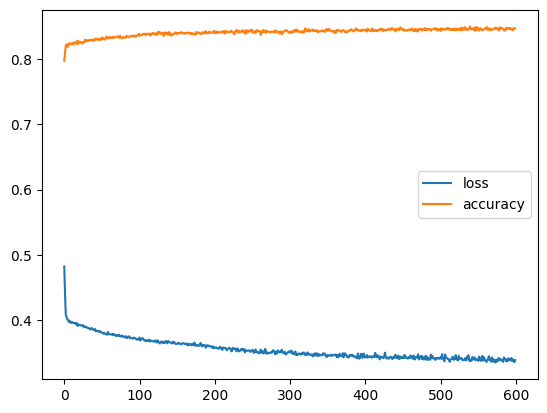

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [53]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.585538387298584
accuracy :  0.8109999895095825


In [54]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[744  52]
 [137  67]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       796
           1       0.56      0.33      0.41       204

    accuracy                           0.81      1000
   macro avg       0.70      0.63      0.65      1000
weighted avg       0.79      0.81      0.79      1000



### Add Dropout Layer

In [55]:
from tensorflow.keras.layers import Dropout

In [56]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [57]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=600,
    verbose=1,
)

Epoch 1/600
282/282 [==============================] - 2s 2ms/step - loss: 0.6080 - accuracy: 0.7141
Epoch 2/600
282/282 [==============================] - 1s 2ms/step - loss: 0.5324 - accuracy: 0.7933
Epoch 3/600
282/282 [==============================] - 1s 2ms/step - loss: 0.5144 - accuracy: 0.7961
Epoch 4/600
282/282 [==============================] - 1s 2ms/step - loss: 0.5105 - accuracy: 0.7962
Epoch 5/600
282/282 [==============================] - 1s 2ms/step - loss: 0.5092 - accuracy: 0.7958
Epoch 6/600
282/282 [==============================] - 1s 2ms/step - loss: 0.5040 - accuracy: 0.7958
Epoch 7/600
282/282 [==============================] - 1s 2ms/step - loss: 0.4994 - accuracy: 0.7954
Epoch 8/600
282/282 [==============================] - 1s 2ms/step - loss: 0.4946 - accuracy: 0.7960
Epoch 9/600
282/282 [==============================] - 1s 2ms/step - loss: 0.4943 - accuracy: 0.7946
Epoch 10/600
282/282 [==============================] - 1s 2ms/step - loss: 0.4896 - accura

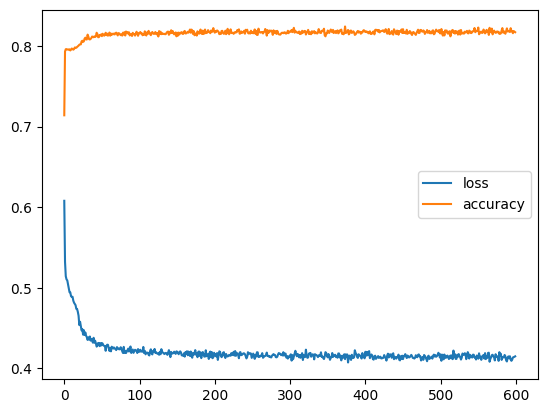

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [59]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3880155384540558
accuracy :  0.8240000009536743


In [60]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[792   4]
 [172  32]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       796
           1       0.89      0.16      0.27       204

    accuracy                           0.82      1000
   macro avg       0.86      0.58      0.58      1000
weighted avg       0.84      0.82      0.77      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [61]:
model = Sequential()

model.add(Dense(36, activation = "relu"))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])


In [62]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [64]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose = 1,
          callbacks = [early_stop])

Epoch 1/500
254/254 [==============================] - 3s 5ms/step - loss: 0.4959 - recall: 0.0000e+00 - val_loss: 0.4632 - val_recall: 0.0000e+00
Epoch 2/500
254/254 [==============================] - 1s 5ms/step - loss: 0.4690 - recall: 0.0000e+00 - val_loss: 0.4473 - val_recall: 0.0000e+00
Epoch 3/500
254/254 [==============================] - 1s 5ms/step - loss: 0.4512 - recall: 0.0248 - val_loss: 0.4222 - val_recall: 0.0994
Epoch 4/500
254/254 [==============================] - 2s 6ms/step - loss: 0.4340 - recall: 0.1144 - val_loss: 0.4055 - val_recall: 0.0939
Epoch 5/500
254/254 [==============================] - 2s 8ms/step - loss: 0.4223 - recall: 0.1646 - val_loss: 0.3937 - val_recall: 0.1768
Epoch 6/500
254/254 [==============================] - 1s 4ms/step - loss: 0.4158 - recall: 0.2240 - val_loss: 0.3928 - val_recall: 0.2376
Epoch 7/500
254/254 [==============================] - 1s 4ms/step - loss: 0.4098 - recall: 0.2585 - val_loss: 0.3850 - val_recall: 0.3149
Epoch 8/500

<Axes: >

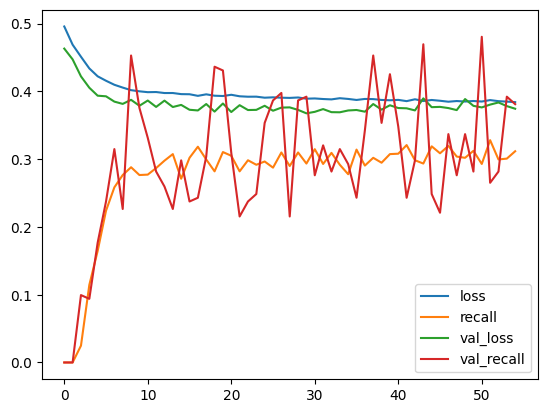

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [66]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3883037269115448
accuracy :  0.406862735748291


In [67]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[754  42]
 [121  83]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       796
           1       0.66      0.41      0.50       204

    accuracy                           0.84      1000
   macro avg       0.76      0.68      0.70      1000
weighted avg       0.82      0.84      0.82      1000



#### Monitor the "val_recall" as metric

In [68]:
model = Sequential()

model.add(Dense(36, activation = "relu"))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [69]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [70]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose = 1,
          callbacks = [early_stop])

Epoch 1/500
254/254 [==============================] - 4s 7ms/step - loss: 0.5141 - recall: 0.0218 - val_loss: 0.4627 - val_recall: 0.0000e+00
Epoch 2/500
254/254 [==============================] - 1s 4ms/step - loss: 0.4734 - recall: 0.0048 - val_loss: 0.4564 - val_recall: 0.0000e+00
Epoch 3/500
254/254 [==============================] - 1s 4ms/step - loss: 0.4603 - recall: 0.0254 - val_loss: 0.4286 - val_recall: 0.0331
Epoch 4/500
254/254 [==============================] - 1s 3ms/step - loss: 0.4329 - recall: 0.0902 - val_loss: 0.3968 - val_recall: 0.1050
Epoch 5/500
254/254 [==============================] - 1s 4ms/step - loss: 0.4130 - recall: 0.1671 - val_loss: 0.3786 - val_recall: 0.1436
Epoch 6/500
254/254 [==============================] - 1s 5ms/step - loss: 0.4042 - recall: 0.2076 - val_loss: 0.3704 - val_recall: 0.2762
Epoch 7/500
254/254 [==============================] - 1s 4ms/step - loss: 0.4027 - recall: 0.2409 - val_loss: 0.3746 - val_recall: 0.3536
Epoch 8/500
254/254

<Axes: >

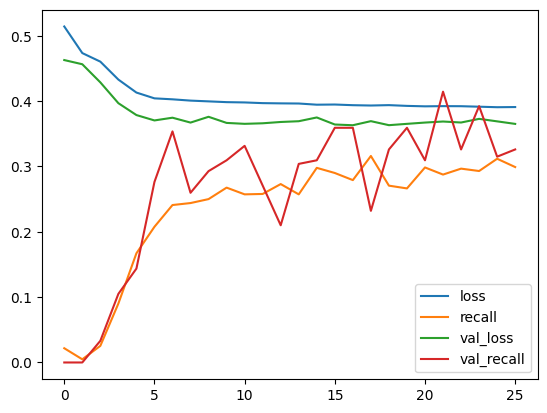

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [73]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.48048898577690125
accuracy :  0.0


In [72]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[796   0]
 [204   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Optuna

In [74]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.4 MB/s eta 0:00:00


In [75]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [76]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [77]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [78]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 06:54:21,107] A new study created in memory with name: no-name-fe459b3b-8e72-4b71-b26f-32f70eb71827
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'> which is of type type.
  w

Restoring model weights from the end of the best epoch: 16.
Epoch 31: early stopping


[I 2023-10-30 06:54:54,452] Trial 0 finished with value: 0.8190000057220459 and parameters: {'n_units1': 82, 'n_units2': 17, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.002283955919869946, 'w0': 2.748315094551936, 'w1': 0.21091128511548174}. Best is trial 0 with value: 0.8190000057220459.


Restoring model weights from the end of the best epoch: 9.
Epoch 24: early stopping


[I 2023-10-30 06:55:05,496] Trial 1 finished with value: 0.7960000038146973 and parameters: {'n_units1': 9, 'n_units2': 9, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 6.67956826877987e-05, 'w0': 1.7543489455935308, 'w1': 0.12669036613792625}. Best is trial 0 with value: 0.8190000057220459.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 06:55:12,043] Trial 2 finished with value: 0.703000009059906 and parameters: {'n_units1': 44, 'n_units2': 43, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.3254718669647888e-05, 'w0': 0.5527875809309208, 'w1': 4.048856878765711}. Best is trial 0 with value: 0.8190000057220459.


Restoring model weights from the end of the best epoch: 21.
Epoch 36: early stopping


[I 2023-10-30 06:55:33,278] Trial 3 finished with value: 0.2720000147819519 and parameters: {'n_units1': 95, 'n_units2': 112, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.014148234880417207, 'w0': 0.022811193419802714, 'w1': 3.730737420078952}. Best is trial 0 with value: 0.8190000057220459.


Restoring model weights from the end of the best epoch: 29.
Epoch 44: early stopping


[I 2023-10-30 06:55:57,355] Trial 4 finished with value: 0.8330000042915344 and parameters: {'n_units1': 122, 'n_units2': 85, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0020212061526370547, 'w0': 0.021060920606602914, 'w1': 0.030660945956596575}. Best is trial 4 with value: 0.8330000042915344.
[I 2023-10-30 06:56:53,542] Trial 5 finished with value: 0.7960000038146973 and parameters: {'n_units1': 102, 'n_units2': 37, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00037668694045241494, 'w0': 2.5478676376551324, 'w1': 1.1507715674879575}. Best is trial 4 with value: 0.8330000042915344.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 06:57:02,721] Trial 6 finished with value: 0.656000018119812 and parameters: {'n_units1': 97, 'n_units2': 65, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0401582190037255, 'w0': 0.032777218190357185, 'w1': 0.3029577069896621}. Best is trial 4 with value: 0.8330000042915344.


Restoring model weights from the end of the best epoch: 23.
Epoch 38: early stopping


[I 2023-10-30 06:57:23,982] Trial 7 finished with value: 0.8080000281333923 and parameters: {'n_units1': 89, 'n_units2': 80, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.002291943951490473, 'w0': 0.19486314942481905, 'w1': 0.013475865845589345}. Best is trial 4 with value: 0.8330000042915344.


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2023-10-30 06:57:35,160] Trial 8 finished with value: 0.7919999957084656 and parameters: {'n_units1': 107, 'n_units2': 44, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.029077306550788364, 'w0': 0.02806138984026124, 'w1': 0.08857530374641402}. Best is trial 4 with value: 0.8330000042915344.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 06:57:41,214] Trial 9 finished with value: 0.22599999606609344 and parameters: {'n_units1': 8, 'n_units2': 112, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 6.359166540179662e-05, 'w0': 0.13841711095946477, 'w1': 2.1923169401630704}. Best is trial 4 with value: 0.8330000042915344.


{'n_units1': 122,
 'n_units2': 85,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.0020212061526370547,
 'w0': 0.021060920606602914,
 'w1': 0.030660945956596575}

In [79]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
16/16 [==============================] - 2s 25ms/step - loss: 0.5630 - recall: 0.1102 - val_loss: 0.4955 - val_recall: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4883 - recall: 0.0000e+00 - val_loss: 0.4748 - val_recall: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4777 - recall: 0.0000e+00 - val_loss: 0.4639 - val_recall: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4730 - recall: 0.0000e+00 - val_loss: 0.4604 - val_recall: 0.0000e+00
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4707 - recall: 0.0030 - val_loss: 0.4596 - val_recall: 0.0110
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4690 - recall: 0.0042 - val_loss: 0.4571 - val_recall: 0.0055
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4670 - recall: 0.0291 - val_loss: 0.4550 - val_recall: 0.0497
Epoch 8/100


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [80]:
history = model.history.history

In [81]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[771  25]
 [145  59]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       796
           1       0.70      0.29      0.41       204

    accuracy                           0.83      1000
   macro avg       0.77      0.63      0.66      1000
weighted avg       0.81      0.83      0.80      1000



32/32 [==============================] - 0s 1ms/step


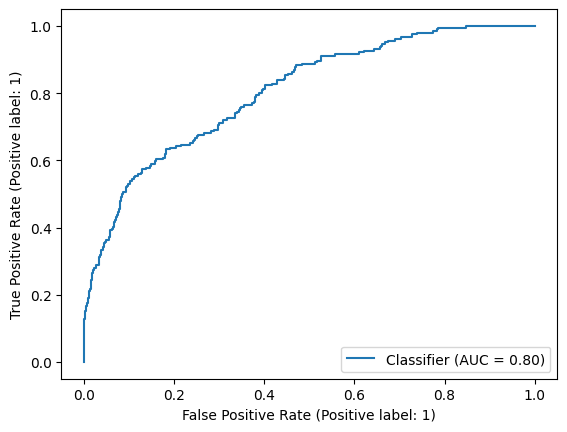

In [82]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [83]:
roc_auc_score(y_test, y_pred_proba)

0.8036998719085623

# Final Model and Model Deployment

In [84]:
import pickle

pickle.dump(scaler, open("scaler_exited", 'wb'))

<Axes: >

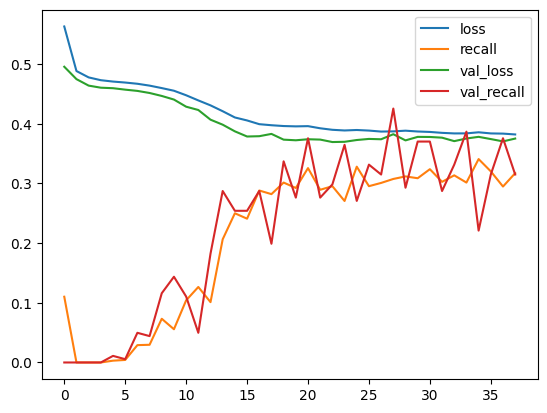

In [85]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [87]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3910242021083832
accuracy:  0.28921568393707275


In [86]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[771  25]
 [145  59]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       796
           1       0.70      0.29      0.41       204

    accuracy                           0.83      1000
   macro avg       0.77      0.63      0.66      1000
weighted avg       0.81      0.83      0.80      1000



In [88]:
model.save('model_exited.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Prediction

In [89]:
from tensorflow.keras.models import load_model

In [90]:
model_exited = load_model("model_exited.h5")
scaler_exited = pickle.load(open("scaler_exited", "rb"))

In [92]:
single_customer = df.drop("Exited", axis=1).iloc[0:1, :]
single_customer

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,2,0.0,1,1,1,101348.88,0,0,0


In [93]:
single_customer = scaler_exited.transform(single_customer)
single_customer

array([[0.538     , 0.2       , 0.        , 0.        , 1.        ,
        1.        , 0.50673489, 0.        , 0.        , 0.        ]])

In [94]:
(model_exited.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 190ms/step


array([[0]], dtype=int32)

In [95]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___